<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import/Export" data-toc-modified-id="Data-Import/Export-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import/Export</a></span><ul class="toc-item"><li><span><a href="#Load-Calibration-Data" data-toc-modified-id="Load-Calibration-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Calibration Data</a></span><ul class="toc-item"><li><span><a href="#AlphaSense-sensors" data-toc-modified-id="AlphaSense-sensors-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>AlphaSense sensors</a></span></li></ul></li><li><span><a href="#Import-Test" data-toc-modified-id="Import-Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Test</a></span></li><li><span><a href="#Import-from-API" data-toc-modified-id="Import-from-API-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import from API</a></span></li><li><span><a href="#Data-Export" data-toc-modified-id="Data-Export-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Export</a></span></li></ul></li><li><span><a href="#Formulas-/-Calculator" data-toc-modified-id="Formulas-/-Calculator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Formulas / Calculator</a></span><ul class="toc-item"><li><span><a href="#One-shot-tests" data-toc-modified-id="One-shot-tests-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One-shot tests</a></span></li><li><span><a href="#Heating-tests" data-toc-modified-id="Heating-tests-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Heating tests</a></span></li></ul></li><li><span><a href="#AlphaSense-Baseline-Calibration" data-toc-modified-id="AlphaSense-Baseline-Calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AlphaSense Baseline Calibration</a></span><ul class="toc-item"><li><span><a href="#TODO:-Correction-Checks" data-toc-modified-id="TODO:-Correction-Checks-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TODO: Correction Checks</a></span></li></ul></li><li><span><a href="#TODO:-MICS-Baseline-Correction" data-toc-modified-id="TODO:-MICS-Baseline-Correction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TODO: MICS Baseline Correction</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Time Series Plots</a></span></li><li><span><a href="#Back2Back-Correlation-Plot" data-toc-modified-id="Back2Back-Correlation-Plot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Back2Back Correlation Plot</a></span></li><li><span><a href="#Full-Seaborn-Correlogram" data-toc-modified-id="Full-Seaborn-Correlogram-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Full Seaborn Correlogram</a></span></li><li><span><a href="#TODO:-Anomaly-Detection" data-toc-modified-id="TODO:-Anomaly-Detection-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>TODO: Anomaly Detection</a></span></li></ul></li><li><span><a href="#Data-Model-(WIP)" data-toc-modified-id="Data-Model-(WIP)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Model (WIP)</a></span><ul class="toc-item"><li><span><a href="#Combine-dataframe" data-toc-modified-id="Combine-dataframe-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Combine dataframe</a></span></li><li><span><a href="#Ordinary-Linear-Regression" data-toc-modified-id="Ordinary-Linear-Regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Ordinary Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Model-Diagnostics" data-toc-modified-id="Model-Diagnostics-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Model Diagnostics</a></span></li></ul></li><li><span><a href="#ML" data-toc-modified-id="ML-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>ML</a></span></li><li><span><a href="#Feature-selection-and-data-training-split" data-toc-modified-id="Feature-selection-and-data-training-split-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Feature selection and data training split</a></span><ul class="toc-item"><li><span><a href="#TODO-Preliminary-Checks" data-toc-modified-id="TODO-Preliminary-Checks-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>TODO Preliminary Checks</a></span><ul class="toc-item"><li><span><a href="#TODO-Dicker-fuller-test-(ADF)" data-toc-modified-id="TODO-Dicker-fuller-test-(ADF)-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>TODO Dicker-fuller test (ADF)</a></span></li><li><span><a href="#TODO-Granger-Casuality-Test" data-toc-modified-id="TODO-Granger-Casuality-Test-6.4.1.2"><span class="toc-item-num">6.4.1.2&nbsp;&nbsp;</span>TODO Granger Casuality Test</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#R-Framework" data-toc-modified-id="R-Framework-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>R Framework</a></span><ul class="toc-item"><li><span><a href="#Initialise-environment" data-toc-modified-id="Initialise-environment-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Initialise environment</a></span></li><li><span><a href="#Install-dependencies" data-toc-modified-id="Install-dependencies-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Install dependencies</a></span></li><li><span><a href="#Load-in-R-libraries" data-toc-modified-id="Load-in-R-libraries-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Load in R libraries</a></span></li><li><span><a href="#Export-Data-to-R-Dataframe" data-toc-modified-id="Export-Data-to-R-Dataframe-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Export Data to R Dataframe</a></span><ul class="toc-item"><li><span><a href="#Renaming-and-timestamp-reading" data-toc-modified-id="Renaming-and-timestamp-reading-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Renaming and timestamp reading</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Pairs-Plot" data-toc-modified-id="Pairs-Plot-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Pairs Plot</a></span></li><li><span><a href="#Coplot" data-toc-modified-id="Coplot-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>Coplot</a></span></li></ul></li><li><span><a href="#Model-Iterations" data-toc-modified-id="Model-Iterations-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Model Iterations</a></span><ul class="toc-item"><li><span><a href="#Model-Diagnostics" data-toc-modified-id="Model-Diagnostics-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>Model Diagnostics</a></span></li><li><span><a href="#Model-Fit-Plot" data-toc-modified-id="Model-Fit-Plot-7.6.2"><span class="toc-item-num">7.6.2&nbsp;&nbsp;</span>Model Fit Plot</a></span><ul class="toc-item"><li><span><a href="#Using-Traditional-R" data-toc-modified-id="Using-Traditional-R-7.6.2.1"><span class="toc-item-num">7.6.2.1&nbsp;&nbsp;</span>Using Traditional R</a></span></li><li><span><a href="#Using-interactive-Plot" data-toc-modified-id="Using-interactive-Plot-7.6.2.2"><span class="toc-item-num">7.6.2.2&nbsp;&nbsp;</span>Using interactive Plot</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [ ]:
# ! pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install
# ! jupyter nbextension install --py fileupload 
# ! jupyter nbextension enable --py fileupload
# ! jupyter nbextension install --py widgetsnbextension 
# ! jupyter nbextension enable --py widgetsnbextension
# ! jupyter nbextensions_configurator enable
# ! jupyter nbextension enable codefolding/main
# ! jupyter nbextension enable toc2/main
! jupyter nbextension enable --py --sys-prefix widgetsnbextension
init_notebook_mode(connected=True)

In [ ]:
## Run this cell to create a button that hides cells

from IPython.display import HTML

HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
## Jupyter stuff
#from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
#from IPython.core.display import HTML
#from IPython.display import display, clear_output
#import ipywidgets as widgets
#from ipywidgets import interact, interactive, fixed, interact_manual

## System
#import io, pytz, os, time, datetime, fileupload
#from shutil import copyfile
#from os.path import dirname, join
#
## Plots
#import matplotlib
#import matplotlib.pyplot as plt
#import seaborn as sns
#
#sns.set(color_codes=True)
#%matplotlib inline
#matplotlib.style.use('seaborn-whitegrid')


---
# Data Import/Export

## Load Calibration Data

Sensor calibration data is stored in json files under the [smartcitizen-iscape_data repository](https://github.com/fablabbcn/smartcitizen-iscape-data/tree/internal_dev/calData) and is loaded automatically from the cells below.

### AlphaSense sensors

In [ ]:
from calData_utils import getCalData
from IPython.display import display

alpha_calData = getCalData('alphasense')
display(alpha_calData)

## Import Test

Import test from local test database. 

**Requirement**:

- Include where the directory of your tests is (GIT LFS directory)
- Make sure that the desired test is available and has been created with the yaml tool

**The cell below will**:

- Load all the kits within the test
- Check if there were alphasense sensors and retrieve their calibration data and order
- Check if there was a reference and convert it units

In [2]:
from test_utils import *

#testsDir = os.getcwd()
testsDir = '/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/03_Development/03_TestResults/TestStructure'

def loadButton(b):
    frequency = frequency_text.value + frequency_drop.value
    global readings
    readings = loadTest()

def clearButton(b):
    global readings
    clearTests()
    readings = {}

display(widgets.HTML('<hr><h4>Import Local Tests</h4>'))

tests = getTests(testsDir)
interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTests, 
                           layout=widgets.Layout(width='700px')))

loadB = widgets.Button(description='Load Local Tests')
loadB.on_click(loadButton)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '10',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

resetB = widgets.Button(description='Clear Tests')
resetB.on_click(clearButton)

buttonBox = widgets.HBox([loadB, resetB])
totalBox = widgets.VBox([frequency_box, buttonBox])
display(totalBox)

------------------------------------------------------


## Test Load

Loading test **2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS** performed from 2018-08-03 to 2018-08-17

Test performed with commit **13c60f0209220487c057f04a2e7d3e8d82655eb7**

<hr />
<p><strong>Comment:</strong> </p>
<p>Long term exposure for late-stage development station.</p>

### KIT

#### STATION_CASE

Kit **STATION_CASE** located **Europe/Madrid**

	**ALPHASENSE**
	{'O3': 204560316, 'SLOTS': ('NO2', 'CO', 'O3'), 'CO': 162031257, 'NO2': 202160413}


Kit **STATION_CASE** has been loaded

#### STATION_CHIMNEY

Kit **STATION_CHIMNEY** located **Europe/Madrid**

	**ALPHASENSE**
	{'O3': 204560314, 'SLOTS': ('CO', 'NO2', 'O3'), 'CO': 162031256, 'NO2': 202560430}


Kit **STATION_CHIMNEY** has been loaded

------------------------------------------------------


## Import from API

In [58]:
from api_utils import *
import re

def getDeviceDataInteractive(b):
    clear_output()
    frequency = frequency_text.value + frequency_drop.value
    devices = kitList.value.strip('').split(',')
    devicesCorrected = list()
    for device in devices: 
        device = re.sub(' ', '', device)
        devicesCorrected.append(device)
    test_name = testName.value
    # print devicesCorrected
    if test_name != '':
        try:
            readings[test_name] = dict()
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency)
        except NameError:
            global readings
            readings = dict()
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency)
    else:
        print 'Input test '

def getKitIDInteractive(b):
    clear_output()
    devices = kitList.value.strip('').split(',')
    kitIDs = list()
    for device in devices:
        kitID = getKitID(device, False)
        kitIDs.append(kitID)
        print('Device {} has kitID {}'.format(device, kitID))
    return kitIDs

kitList = widgets.Text(description = 'Kit List: ')
testName = widgets.Text(description = 'Input Test Name')

getKitIDb = widgets.Button(description='Get Kit ID')
getKitIDb.on_click(getKitIDInteractive)

loadAPIb = widgets.Button(description='Load API Kit')
loadAPIb.on_click(getDeviceDataInteractive)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '10',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='50px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

Hbox = widgets.HBox([kitList, testName])
ButtonBox = widgets.HBox([getKitIDb, loadAPIb])
Box = widgets.VBox([Hbox, frequency_box, ButtonBox])

display(Box)

<ipython-input-58-91496a454336>:19: SyntaxWarning: name 'readings' is used prior to global declaration
  global readings


In [ ]:
## Input this automatically

readings['TEST_NAME']['devices']['4748']['alphasense']['O3'] = 204560316
readings['TEST_NAME']['devices']['4748']['alphasense']['NO2'] = 202160413
readings['TEST_NAME']['devices']['4748']['alphasense']['CO'] = 162031257
readings['TEST_NAME']['devices']['4748']['alphasense']['SLOTS'] = ('NO2', 'CO', 'O3')

print readings['TEST_NAME']['devices']['4748']['alphasense']

## Data Export

In [ ]:
from IPython.display import FileLink
global selected
selected = []

def selectedFilesChannels(x):
    selected = list(x)
    
selected_export=tuple()
def selectedDevices_export(Source):
    global selected_export
    selected_export = list(Source)
    
def show_device_export(Source):
    _devices_select_export.options = [s for s in list(readings[_test_export.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    
def exportFile(b):
    for i in range(len(selected_export)):
        b.f = selected_export[i]
        exportDir = exportPath.value
        if not os.path.exists(exportDir): os.mkdir(exportDir)
        savePath = os.path.join(exportDir, b.f)
        if not os.path.exists(savePath):
            readings[_test_export.value]['devices'][b.f]['data'].to_csv(savePath + '.csv', sep=",")
            display(FileLink(savePath))
        else:
            display(widgets.HTML('File Already exists!'))

# Test dropdown
layout = widgets.Layout(width='400px')
_test_export = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_export_drop = widgets.interactive(show_device_export, 
                                Source=_test_export, 
                                layout=layout)

_devices_select_export = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_export_drop = interact(selectedDevices_export,
                                 Source = _devices_select_export)

display(widgets.HTML('<h3>Export Files</h3>'))
exportPath = widgets.Text(description = 'Type in export path  ', layout=widgets.Layout(width='700px'))
eb = widgets.Button(description='Export file', layout=widgets.Layout(width='150px'))
eb.on_click(exportFile)

selectBox = widgets.VBox([_test_export_drop, _devices_select_export])
exportBox = widgets.HBox([exportPath,eb])
_BOX=widgets.VBox([selectBox, exportBox])
display(_BOX)

# Formulas / Calculator
Input your formulas into this cell for analysis in the plots below

There are formulas for calculating:
- *MICS* = Poly(R, H, T) - **MICS_FORMULA**
- *Alphasense's correction proposal* = f(Curr, Sens, Zero) - **AD_FORMULA**
- *Smoothing* = f(Signal, Window) - **SMOOTH**
- *Absolute humidity* = f(Temperature, Humidity, Pressure) - **ABS_HUM**

In [ ]:
from formula_utils import *
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

def show_device_list(Source):
    _devices_select.options = [s for s in list(readings[_test.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def commonChannels(selected):
    global commonChannelsList
    commonChannelsList = []
    if (len(selected) == 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
    if (len(selected) > 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
        for s in list(selected):
            commonChannelsList = list(set(commonChannelsList) & set(readings[_test.value]['devices'][s]['data'].columns))
    _Aterm.options = list(commonChannelsList)
    _Aterm.source = selected
    _Bterm.options = list(commonChannelsList)
    _Bterm.source = selected
    _Cterm.options = list(commonChannelsList)
    _Cterm.source = selected
    _Dterm.options = list(commonChannelsList)
    _Dterm.source = selected
    
def calculateFormula(b):
    clear_output()
    A = _Aterm.value
    B = _Bterm.value
    C = _Cterm.value
    D = _Dterm.value
    Name = _formulaName.value
    for s in list(selected):
        result = functionFormula(s,A,B,C,D,readings)
        readings[_test.value]['devices'][s]['data'][Name] = result
    print "Formula {} Added in test {}".format(Name, _test.value)
    
def functionFormula(s, Aname, Bname, Cname, Dname, _readings): 
    calcData = pd.DataFrame()
    mergeData = pd.merge(pd.merge(pd.merge(_readings[_test.value]['devices'][s]['data'].loc[:,(Aname,)],_readings[_test.value]['devices'][s]['data'].loc[:,(Bname,)],left_index=True, right_index=True), _readings[_test.value]['devices'][s]['data'].loc[:,(Cname,)], left_index=True, right_index=True),_readings[_test.value]['devices'][s]['data'].loc[:,(Dname,)],left_index=True, right_index=True)
    calcData[Aname] = mergeData.iloc[:,0] #A
    calcData[Bname] = mergeData.iloc[:,1] #B
    calcData[Cname] = mergeData.iloc[:,2] #C
    calcData[Dname] = mergeData.iloc[:,3] #D
    A = calcData[Aname]
    B = calcData[Bname]
    C = calcData[Cname]
    D = calcData[Dname]
    result = eval(_formula.value)
    return result
        
selected=tuple()
def selectedDevices(Source):
    global selected
    selected = list(Source)
    commonChannels(selected)

# Test dropdown
layout = widgets.Layout(width='400px')
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_device_list, 
                                Source=_test, 
                                layout=layout)

_Aterm = widgets.Dropdown(description = 'A', layout=layout)
_Bterm = widgets.Dropdown(description = 'B', layout=layout)
_Cterm = widgets.Dropdown(description = 'C', layout=layout)
_Dterm = widgets.Dropdown(description = 'D', layout=layout)

_devices_select = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_drop = interact(selectedDevices,
                                 Source = _devices_select)

_selectBox = widgets.VBox([_test_drop, _devices_select])

_formulaName = widgets.Text(description = 'Name: ')
_formula = widgets.Text(description = '=')
_ABtermsBox = widgets.HBox([_Aterm, _Bterm])
_CDtermsBox = widgets.HBox([_Cterm, _Dterm])
_termsBox = widgets.VBox([_selectBox, _ABtermsBox, _CDtermsBox])
_calculate = widgets.Button(description='Calculate')
_calculateBox = widgets.HBox([_formulaName,_formula, _calculate])
_calculate.on_click(calculateFormula)

display(widgets.HTML('<hr><h4>Select the Files for your formulas to apply</h4>'))
display(_termsBox)
display(widgets.HTML('<h4>Input your formula Below</h4>'))
display(_calculateBox)

## Vapour equilibrium: B is temperature in degC, assumed 1013mbar
# (1.0007 + 3.46*1e-6*1013)*6.1121*np.exp(17.502*B/(240.97+B))

## One-shot tests

In [ ]:
# Plot One-shot tests
from signal_utils import plot_oneshots
channels_pm = ['PM 1.0', 'PM 2.5', 'PM 10.0']
device_one_shot = 'KIT_1_ALTERNATE'
plot_oneshots(readings, channels_pm, device_one_shot)

## Heating tests

In [ ]:
# To run in temperature tests with current that have 'ON_OFF' calculated with greater(current, 20)
from signal_utils import split_agnostisise

for reading in readings:
    print (reading)
    dataframeResult = split_agnostisise(readings, reading, 'ON_OFF')
    # dataframeResult = split_agnostisise(readings, reading, 'measuring')
    readings[reading]['devices']['analysis'] = dict()
    readings[reading]['devices']['analysis']['data'] = dict()
    readings[reading]['devices']['analysis']['data'] = dataframeResult

# AlphaSense Baseline Calibration

These functions are used to create the alphasense pollutant correction based on Working, Auxiliary and calibration data provided by alphasense. Run the 1.1.1.1 AlphaSense Sensors calibration data cell to load in the necessary files.

In [ ]:
from pollutant_cal_utils import *
%matplotlib inline
ad_append = 'AD_BASE'

selectedTestsAD = tuple()
def selectTestAD(x):
    global selectedTestsAD
    selectedTestsAD = list(x)
    
def calculateCorrectionAD(b):
    clear_output()
    for testAD in selectedTestsAD:
        # Look for a reference
        for reading in readings[testAD]['devices']:
            if 'is_reference' in readings[testAD]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testAD]['devices'][reading]['data']
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in readings[testAD]['devices']:
            if 'alphasense' in readings[testAD]['devices'][kit]:
                
                sensorID = readings[testAD]['devices'][kit]['alphasense']
                sensorID_CO = readings[testAD]['devices'][kit]['alphasense']['CO']
                sensorID_NO2 = readings[testAD]['devices'][kit]['alphasense']['NO2']
                sensorID_OX = readings[testAD]['devices'][kit]['alphasense']['O3']
                sensorSlots = readings[testAD]['devices'][kit]['alphasense']['SLOTS']
                              
                sensorID = (['CO', sensorID_CO, 'classic', 'single_temp', sensorSlots.index('CO')+1], 
                            ['NO2', sensorID_NO2, 'baseline', 'single_aux', sensorSlots.index('NO2')+1], 
                            ['O3', sensorID_OX, 'baseline', 'single_aux', sensorSlots.index('O3')+1])
                
                # Calculate correction
                readings[testAD]['devices'][kit]['data'], CorrParams = calculatePollutantsAlpha(
                        _dataframe = readings[testAD]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = ad_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _deltas = deltas,
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = checkBoxDecomp.value,
                        _plotsInter = checkBoxPlotsIn.value, 
                        _plotResult = checkBoxPlotsResult.value,
                        _verbose = checkBoxVerb.value, 
                        _printStats = checkBoxStats.value)

# Find out which tests have alphasense values
testAlphaSense = list()
for test in readings:
    for kit in readings[test]['devices']:
        if 'alphasense' in readings[test]['devices'][kit] and test not in testAlphaSense:
            testAlphaSense.append(test)

            
display(widgets.HTML('<h4>Select the tests containing alphasense to calculate correction</h4>'))
            
interact(selectTestAD,
         x = widgets.SelectMultiple(options=testAlphaSense, 
                           description='Select tests below', 
                           selected_labels = selectedTestsAD, 
                           layout=widgets.Layout(width='700px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionAD)

# Synchronise Checkbox

checkBoxDecomp = widgets.Checkbox(value=False, 
                                  description='Decomp')
checkBoxPlotsIn = widgets.Checkbox(value=False, 
                                  description='Plots Inter')     
checkBoxVerb = widgets.Checkbox(value=False, 
                                  description='Verbose') 
checkBoxPlotsResult = widgets.Checkbox(value=True, 
                                  description='Plots Results') 
checkBoxStats = widgets.Checkbox(value=True, 
                                  description='Print Stats') 

Box = widgets.HBox([calculateCorrection, checkBoxDecomp, checkBoxPlotsIn, checkBoxVerb, checkBoxPlotsResult, checkBoxStats])
display(Box)

## TODO: Correction Checks

In [ ]:
# Sample For stats checks
pollutant = 'NO2'
display(CorrParams[pollutant])

with plt.style.context('seaborn-white'):
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    
    ax1.legend(loc='best')
    ax1.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax1.set_ylabel('Avg Temp-Hum / day')
    ax1.grid(True)
    ax2.legend(loc='best')
    ax2.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax2.set_ylabel('Avg Temp / day')
    ax2.grid(True)
    
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax3.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_pollutant'], label = 'Avg Pollutant', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['deltaAuxBas_avg'], label = 'Delta', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['ratioAuxBas_avg'] , label = 'Ratio', linestyle='-', linewidth=0, marker='o')
    
    ax3.legend(loc='best')
    ax3.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax3.set_ylabel('Avg {} / day'.format(pollutant))
    ax3.grid(True)
    ax4.legend(loc='best')
    ax4.set_xlabel('{} Average'.format(pollutant))
    ax4.set_ylabel('Offset / Ratio Baseline vs Auxiliary')
    ax4.grid(True)

# TODO: MICS Baseline Correction

In [ ]:
from pollutant_cal_utils import *
from test_utils import ref_append
%matplotlib inline
mics_append = 'MICS_BASE_CALC'

selectedTestsMICS = tuple()
def selectTestMICS(x):
    global selectedTestsMICS
    selectedTestsMICS = list(x)
    
def calculateCorrectionMICS(b):
    clear_output()
    for testMICS in selectedTestsMICS:
        # Look for a reference
        for reading in readings[testMICS]['devices']:
            # If there is reference, use it
            if 'is_reference' in readings[testMICS]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testMICS]['devices'][reading]['data']
                break
            # If not, at least use alphasense data
            elif 'alphasense' in readings[testMICS]['devices'][reading]:
                refAvail = True
                
                dataframeRef = readings[testMICS]['devices'][reading]['data'].loc[:,['CO_' + ad_append, 'NO2_' + ad_append, 'O3_' + ad_append ]]
                # Rename to be a reference
                for name in dataframeRef.columns:
                    namesub = re.sub(ad_append, ref_append, name)
                    dataframeRef.rename(columns={name: namesub}, inplace=True)
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in deviceMICS:
            if 'mics' in readings[testMICS]['devices'][kit]:
                
                sensorID = readings[testMICS]['devices'][kit]['mics']               
                sensorID = (['CO', sensorID, 'baseline', 'single_temp'], 
                            ['NO2', sensorID, 'baseline', 'single_temp'])
            
            # Temporary until better understanding
            else:
                sensorID = (['CO', 1, 'baseline', 'single_temp'], 
                            ['NO2', 1, 'baseline', 'single_temp'])
                
            # Calculate correction
            readings[testMICS]['devices'][kit]['data'], CorrParams = calculatePollutantsMICS(
                        _dataframe = readings[testMICS]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = mics_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _deltas = deltasMICS,
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = False,
                        _plotsInter = False, 
                        _plotResult = True,
                        _verbose = False, 
                        _printStats = True)

# Find out which tests have measured the mics
testMICS = list()
deviceMICS = list()
for test in readings:
    for kit in readings[test]['devices']:
        columnsTest = readings[test]['devices'][kit]['data'].columns
        if ('CO_MICS_RAW' in columnsTest or 'NO2_MICS_RAW' in columnsTest):
            if test not in testMICS:
                testMICS.append(test)
            if kit not in deviceMICS:
                deviceMICS.append(kit)
            
display(widgets.HTML('<h4>Select the tests containing MICS to calculate correction</h4>'))
            
interact(selectTestMICS,
         x = widgets.SelectMultiple(options=testMICS, 
                           description='Select tests below', 
                           selected_labels = selectedTestsMICS, 
                           layout=widgets.Layout(width='1000px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionMICS)
deltasMICS = np.arange(1,100,1)
display(calculateCorrection)

---
# Exploratory Data Analysis

## Time Series Plots

In [ ]:
from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
from IPython.core.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

init_notebook_mode(connected=True)

# Plot Y limits
setLimits = False
maxY = 15000
minY = 0

toshow = []
axisshow = []
# meanTable = []

def show_devices(Source):
    _device.options = [s for s in list(readings[Source]['devices'].keys())]
    _device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def show_sensors(Source):
    _sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    _sensor_drop.source = Source
    _min_date.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    _max_date.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr

def clear_all(b):
    clear_output()
    del toshow[:]
    del axisshow[:]

def add_sensor(b):
    clear_output()
    d = [_device.source, _sensor_drop.source, _sensor_drop.value]
    
    if d not in toshow: 
        toshow.append(d)
        axisshow.append(_axis_drop.value)
        
    plot_data = readings[toshow[0][0]]['devices'][toshow[0][1]]['data'].loc[:,(toshow[0][2],)]
    list_data_primary = []
    list_data_secondary = []
    list_data_terciary = []
    
    if b.slice_time:
        plot_data = plot_data[plot_data.index > _min_date.value]
        plot_data = plot_data[plot_data.index < _max_date.value]
    
    if len(toshow) > 1:
        for i in range(1, len(toshow)):
            plot_data = pd.merge(plot_data, readings[toshow[i][0]]['devices'][toshow[i][1]]['data'].loc[:,(toshow[i][2],)], left_index=True, right_index=True)

    print ('-------------------------------------')
    print (' Medias:\n')
    meanTable = []
    for d in toshow:
        myMean = ' ' + d[1]  + "\t" + d[2] + "\t"
        meanTable.append(myMean)   
    res = plot_data.mean()
    for i in range(len(meanTable)): print (meanTable[i] + '%.2f' % (res[i]))
    print ('-------------------------------------')
    
    print ('-------------------------------------')
    print (' Std Deviation:\n')
    stdTable = []
    for d in toshow:
        myStd = ' ' + d[1]  + "\t" + d[2] + "\t"
        stdTable.append(myStd)   
    std = plot_data.std()
    for i in range(len(stdTable)): print stdTable[i] + '%.2f' % (std[i])
    print ('-------------------------------------')

    # Change columns naming
    changed = []
    for i in range(len(plot_data.columns)):
        changed.append(toshow[i][0] + ' - '+ toshow[i][1] + ' - '+ plot_data.columns[i])
    plot_data.columns = changed
    
    subplot_rows = 0
    if len(toshow) > 0:
        for i in range(len(toshow)):
            if axisshow[i]=='1': 
                list_data_primary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,1)
            if axisshow[i]=='2': 
                list_data_secondary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,2)
            if axisshow[i]=='3': 
                list_data_terciary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,3)
          
        
    fig1 = tls.make_subplots(rows=subplot_rows, cols=1, shared_xaxes=_synchroniseXaxis.value)

    #if len(list_data_primary)>0:
        #fig1 = plot_data.iplot(kind='scatter', y = list_data_primary, asFigure=True, layout = layout)
    #ply.offline.iplot(fig1)
    
    for i in range(len(list_data_primary)):
        fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_primary[i]], 'type': 'scatter', 'name': list_data_primary[i]}, 1, 1)

    for i in range(len(list_data_secondary)):
        fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_secondary[i]], 'type': 'scatter', 'name': list_data_secondary[i]}, 2, 1)
    
    for i in range(len(list_data_terciary)):
        fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_terciary[i]], 'type': 'scatter', 'name': list_data_terciary[i]}, 3, 1)

    if setLimits: 
        fig1['layout'].update(height = 800,
                            legend=dict(x=-.1, y=1.2) ,
                           xaxis=dict(title='Time'))
                          
    else:
        fig1['layout'].update(height = 800,
                              legend=dict(x=-.1, y=1.2) ,
                           xaxis=dict(title='Time'))
                           
    ply.offline.iplot(fig1)
    
def reset_time(b):
    _min_date.value = readings[b.src.value].index.min()._short_repr
    _max_date.value = readings[b.src.value].index.max()._short_repr

layout=widgets.Layout(width='330px')

# Test dropdown
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout=layout)

# Device dropdown
_device = widgets.Dropdown(layout=layout,
                        description = 'Device')

_device_drop = widgets.interactive(show_sensors, 
                                Source=_device, 
                                layout=layout)

# Sensor dropdown
_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')

# Buttons
_b_add = widgets.Button(description='Add to Plot', layout=widgets.Layout(width='120px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='120px'))
_b_reset_all.on_click(clear_all)

# Axis dropdown
_axis_drop = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Subplot:',
    disabled=False,
)

# Synchronise Checkbox
_synchroniseXaxis = widgets.Checkbox(value=False, 
                                     description='Synchronise X axis', 
                                     disabled=False, 
                                     layout=widgets.Layout(width='300px'))

# Date fields
_min_date = widgets.Text(description='Start date:', 
                         layout=widgets.Layout(width='330px'))
_max_date = widgets.Text(description='End date:', 
                         layout=widgets.Layout(width='330px'))

# Date buttons
_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
_b_apply_time.on_click(add_sensor)
_b_apply_time.slice_time = True
_b_reset_time = _b_reset = widgets.Button(description='Reset dates', layout=widgets.Layout(width='100px'))
_b_reset_time.on_click(reset_time)
#_b_reset_time.src = _kit


_device_box = widgets.HBox([_test_drop, _device_drop])
_sensor_box = widgets.HBox([_sensor_drop, _axis_drop, _synchroniseXaxis])
_plot_box = widgets.HBox([_b_add , _b_reset_all])
_time_box = widgets.HBox([_min_date,_max_date, _b_reset_time, _b_apply_time])
_root_box = widgets.VBox([_time_box, _device_box, _sensor_box, _plot_box])
display(_root_box)

## Back2Back Correlation Plot

In [ ]:
cropTime = False
min_date = "2001-01-01 00:00:01"
max_date = "2001-01-01 00:00:01"
doubleAxis = True

from sklearn.metrics import mean_squared_error
from math import sqrt

# Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

def show_devices(Source):
    A_device.options = [s for s in list(readings[Source]['devices'].keys())]
    A_device.source = Source
    B_device.options = [s for s in list(readings[Source]['devices'].keys())]
    B_device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    

def show_sensors_A(Source):
    A_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    A_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr
    
def show_sensors_B(Source):
    B_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    B_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr    

# def show_sensors_A(Source):
#     A_sensors_drop.options = [s for s in list(readings[Source].columns)]
#     A_sensors_drop.source = Source
#     minCropDate.value = readings[Source].index.min()._short_repr
#     maxCropDate.value = readings[Source].index.max()._short_repr
    
# def show_sensors_B(Source):
#     B_sensors_drop.options = [s for s in list(readings[Source].columns)]
#     B_sensors_drop.source = Source
#     minCropDate.value = readings[Source].index.min()._short_repr
#     maxCropDate.value = readings[Source].index.max()._short_repr
    
def redraw(b):
    cropTime = cropTimeCheck.value
    doubleAxis = doubleAxisCheck.value
    min_date = minCropDate.value
    max_date = maxCropDate.value
    mergedData = pd.merge(readings[_test.value]['devices'][A_device.value]['data'].loc[:,(A_sensor_drop.value,)], 
                          readings[_test.value]['devices'][B_device.value]['data'].loc[:,(B_sensor_drop.value,)], 
                          left_index=True, right_index=True, suffixes=('_'+A_sensor_drop.value, '_'+B_sensor_drop.value))
    clear_output()
    
    if cropTime:
        mergedData = mergedData[mergedData.index > min_date]
        mergedData = mergedData[mergedData.index < max_date]
        
    #jointplot
    df = pd.DataFrame()
    A = A_sensor_drop.value + '-' + A_device.value
    B = B_sensor_drop.value + '-' + B_device.value
    df[A] = mergedData.iloc[:,0]
    df[B] = mergedData.iloc[:,1]
    
    
    sns.set(font_scale=1.3)
    sns.set_style("whitegrid")
    sns.jointplot(A, B, data=df, kind="reg", color="b", size=12, scatter_kws={"s": 80});
    print "data from " + str(df.index.min()) + " to " + str(df.index.max())                      
    pearsonCorr = list(df.corr('pearson')[list(df.columns)[0]])[-1]
    rmse = sqrt(mean_squared_error(df[A].fillna(0), df[B].fillna(0)))
    print 'Pearson correlation coefficient: ' + str(pearsonCorr)
    print 'Coefficient of determination R²: ' + str(pearsonCorr*pearsonCorr)
    print 'RMSE: ' + str(rmse)

    if cropTime: 
        
        if (doubleAxis):
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                yaxis2=dict(title=B,titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
            
    else:
        if (doubleAxis):
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            yaxis2=dict(title=B, titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
        
    trace0 = go.Scatter(x=df[A].index, y=df[A], name = A,line = dict(color='rgb(0,97,255)'))
    
    if (doubleAxis):
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, yaxis='y2', line = dict(color='rgb(255,165,0)'))
    else:
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, line = dict(color='rgb(255,165,0)'))
    data = [trace0, trace1]
    figure = go.Figure(data=data, layout=layout)
    ply.offline.iplot(figure)
    
if len(readings) < 1: print ("Please load some data first...")
else:
    
    layout=widgets.Layout(width='350px')
    b_redraw = widgets.Button(description='Redraw')
    b_redraw.on_click(redraw)
    doubleAxisCheck = widgets.Checkbox(value=False, description='Secondary y axis', disabled=False)
    
    cropTimeCheck = widgets.Checkbox(value=False,description='Crop Data in X axis', disabled=False)
    minCropDate = widgets.Text(description='Start date:', layout=layout)
    maxCropDate = widgets.Text(description='End date:', layout=layout)
    
    # Test dropdown
    _test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout = widgets.Layout(width='500px'),
                        description = 'Test')

    _test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout = widgets.Layout(width='500px'))

    # Device dropdown
    A_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    A_device_drop = widgets.interactive(show_sensors_A, 
                                    Source=A_device, 
                                    layout=layout)
    
    B_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    B_device_drop = widgets.interactive(show_sensors_B, 
                                    Source=B_device, 
                                    layout=layout)
    
    # Sensor dropdown
    A_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    # Sensor dropdown
    B_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    # A_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=widgets.Layout(width='350px') ,value=readings.keys()[0])
    # A_kit_drop = widgets.interactive(show_sensors_A, Source=A_kit, layout=layout)
    # A_sensors_drop = widgets.Dropdown(layout=widgets.Layout(width='350px'))
    # show_sensors_A(readings.keys()[0])
    # 
    # B_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=widgets.Layout(width='350px'), value=readings.keys()[1])
    # B_kit_drop = widgets.interactive(show_sensors_B, Source= B_kit, layout=layout)
    # B_sensors_drop = widgets.Dropdown(layout=widgets.Layout(width='350px'))
    # show_sensors_B(readings.keys()[1])
    
    draw_box = widgets.HBox([b_redraw, doubleAxisCheck], layout=widgets.Layout(justify_content='space-between'))
    test_box = widgets.HBox([_test_drop], layout = widgets.Layout(width='500px'))
    device_box = widgets.HBox([A_device, widgets.HTML('<h4><< Data source >></h4>') , B_device], layout=widgets.Layout(justify_content='space-between'))
    sensor_box = widgets.HBox([A_sensor_drop, widgets.HTML('<h4><< Sensor selection >></h4>') , B_sensor_drop], layout=widgets.Layout(justify_content='space-between'))
    crop_box = widgets.HBox([cropTimeCheck, minCropDate, maxCropDate], layout=widgets.Layout(justify_content='space-between'))
    root_box = widgets.VBox([draw_box, test_box, device_box, sensor_box, crop_box])
    
    display(root_box)
    
    #redraw(b_redraw)

## Full Seaborn Correlogram

In [ ]:
def paint(Source):
    clear_output()
    sns.set(font_scale=1.4)
    g = sns.PairGrid(readings.values()[0])
    g = g.map(plt.scatter)

_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=layout)
_kit_drop = widgets.interactive(paint, Source=_kit, layout=layout)
display(_kit_drop)

## TODO: Anomaly Detection

Check this here https://annals-csis.org/proceedings/2012/pliks/118.pdf.

Below we'll use the Holt-Winters function as defined:

$$\hat y_{max_x}=\ell_{x−1}+b_{x−1}+s_{x−T}+m⋅d_{t−T}$$

$$\hat y_{min_x}=\ell_{x−1}+b_{x−1}+s_{x−T}-m⋅d_{t−T}$$

$$d_t=\gamma∣y_t−\hat y_t∣+(1−\gamma)d_{t−T},$$


In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

In [ ]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        plt.plot(series.values, "c", label = "Actual")
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        plt.plot(series.values, label = "Actual")
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

**Quick** demonstration of smoothing functions

# Data Model (WIP)

## Combine dataframe

In [3]:
from test_utils import combine_data

name_combined_data = 'COMBINED_DEVICES'

for reading in readings:
    ## Since we don't know if there are more or less channels than last time
    ## (and tbh, I don't feel like checking), remove the key
    readings[reading]['devices'].pop('COMBINED_DEVICES', None)
    ## And then add it again
    dataframe = combine_data(readings[reading]['devices'], True)
    readings[reading]['devices'][name_combined_data] = dict()
    readings[reading]['devices'][name_combined_data]['data'] = dict()
    readings[reading]['devices'][name_combined_data]['data'] = dataframe


## Ordinary Linear Regression

In [4]:
test_linear_regression = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

for channel in readings[test_linear_regression]['devices'][name_combined_data]['data'].columns:
    print channel

BATT_STATION_CASE
BATT_STATION_CHIMNEY
CO_MICS_RAW_STATION_CASE
CO_MICS_RAW_STATION_CHIMNEY
CO_MICS_STATION_CHIMNEY
CO_MICS_THEAT_STATION_CHIMNEY
GB_1A_STATION_CASE
GB_1A_STATION_CHIMNEY
GB_1W_STATION_CASE
GB_1W_STATION_CHIMNEY
GB_2A_STATION_CASE
GB_2A_STATION_CHIMNEY
GB_2W_STATION_CASE
GB_2W_STATION_CHIMNEY
GB_3A_STATION_CASE
GB_3A_STATION_CHIMNEY
GB_3W_STATION_CASE
GB_3W_STATION_CHIMNEY
GB_CO_STATION_CASE
GB_CO_STATION_CHIMNEY
GB_HUM_STATION_CASE
GB_HUM_STATION_CHIMNEY
GB_NO2_STATION_CASE
GB_NO2_STATION_CHIMNEY
GB_O3_STATION_CASE
GB_O3_STATION_CHIMNEY
GB_TEMP_STATION_CASE
GB_TEMP_STATION_CHIMNEY
HUM_STATION_CASE
HUM_STATION_CHIMNEY
LIGHT_STATION_CASE
LIGHT_STATION_CHIMNEY
NO2_MICS_RAW_STATION_CASE
NO2_MICS_RAW_STATION_CHIMNEY
NO2_MICS_THEAT_STATION_CHIMNEY
PM_10_STATION_CASE
PM_10_STATION_CHIMNEY
PM_1_STATION_CASE
PM_1_STATION_CHIMNEY
PM_25_STATION_CASE
PM_25_STATION_CHIMNEY
PRESS_STATION_CASE
PRESS_STATION_CHIMNEY
TEMP_STATION_CASE
TEMP_STATION_CHIMNEY


                            OLS Regression Results                            
Dep. Variable:                    REF   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     813.5
Date:                Wed, 05 Sep 2018   Prob (F-statistic):          5.10e-216
Time:                        10:53:47   Log-Likelihood:                -2268.2
No. Observations:                 500   AIC:                             4546.
Df Residuals:                     495   BIC:                             4567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5347      2.015      0.

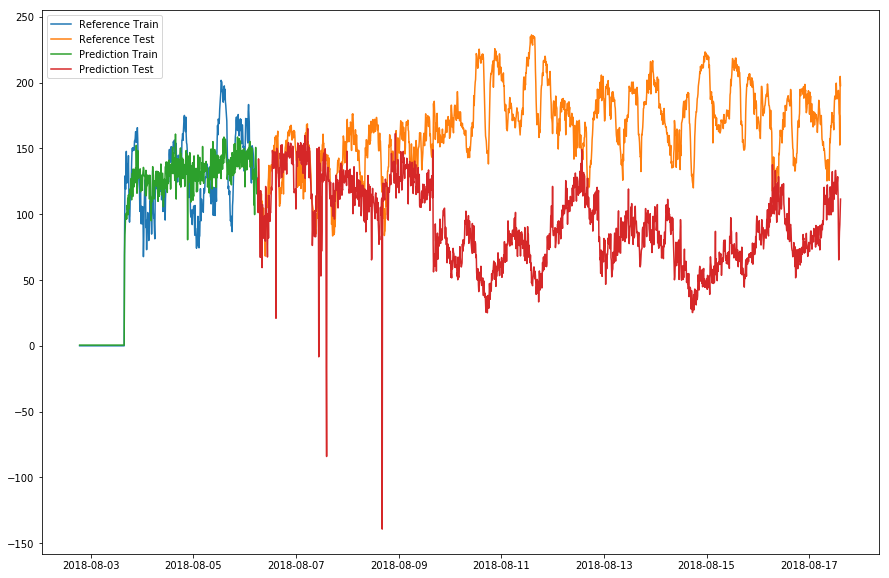

In [31]:
import statsmodels.formula.api as smform
import statsmodels.api as smapi
import statsmodels.graphics as smgraph
from math import sqrt

## Metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error#, mean_squared_log_error

# Plots
import matplotlib.pyplot as plot

## Select data

REF = 'CO_MICS_RAW_STATION_CASE'
A = 'PM_25_STATION_CASE'
B = 'PM_10_STATION_CASE'
C = 'HUM_STATION_CASE'

n_train_periods = 500

## Prepare Data Frame
dataframeTrain = readings[test_linear_regression]['devices'][name_combined_data]['data'].iloc[:n_train_periods,:]
dataframeTrain = dataframeTrain.fillna(0)
dataframeTrain['const'] = 1
dataframeTest = readings[test_linear_regression]['devices'][name_combined_data]['data'].iloc[n_train_periods:,:]
dataframeTest = dataframeTest.fillna(0)
dataframeTest['const'] = 1

dataTrain = {"REF": dataframeTrain.loc[:,REF].values, 
        "a": dataframeTrain.loc[:,A].values, 
        "b": dataframeTrain.loc[:,B].values,
        "c": dataframeTrain.loc[:,C].values,
        "const": dataframeTrain.loc[:,'const'].values}

dataTest = {"REF": dataframeTest.loc[:,REF].values, 
        "a": dataframeTest.loc[:,A].values, 
        "b": dataframeTest.loc[:,B].values,
        "c": dataframeTest.loc[:,C].values,
        "const": dataframeTest.loc[:,'const'].values}

# Fit model
model = smform.OLS.from_formula(formula = 'REF ~ a + np.power(b, 2) + b + c', data = dataTrain).fit()
print(model.summary())

## Predict Results
predictionTrain = model.predict(dataTrain)
predictionTest = model.predict(dataTest)

referenceTrain = dataframeTrain.loc[:,REF].values
referenceTest = dataframeTest.loc[:,REF].values

# Calculate RMSE
rmseTrain = sqrt(mean_squared_error(predictionTrain, referenceTrain))
rmseTest = sqrt(mean_squared_error(predictionTest, referenceTest))

print('------------------------')
print('Train RMSE: %.3f' % rmseTrain)
print('Test RMSE: %.3f' % rmseTest)

# Plot the stuff
plot.figure(figsize=(15,10))
# Actual data
plot.plot(dataframeTrain.index, referenceTrain, label = 'Reference Train')
plot.plot(dataframeTest.index, referenceTest, label = 'Reference Test')
# Forecast
plot.plot(dataframeTrain.index, predictionTrain, label = 'Prediction Train')
plot.plot(dataframeTest.index, predictionTest, label = 'Prediction Test')

plot.legend(loc ='best')
plot.show()

### Model Diagnostics
More into detail for model diagnostics [here](https://www.statmethods.net/stats/rdiagnostics.html) and [here](https://socialsciences.mcmaster.ca/jfox/Courses/Brazil-2009/index.html)

All the plots explanations are [here](https://stats.stackexchange.com/questions/5135/interpretation-of-rs-lm-output). As a rule of a thumb: if Pr(>|t|) is very small, means the value is significant - P-value < 0.05 is OK.

Use **Jarque Bera Test** to check if the regression errors are normally distributed for DW test (assumes that the regression errors are normally distributed). The p-value is the probability of the null hypotesis (which for the Jarque Bera Test is that the distribution is normal)

Check for autocorrelation of the residuals, with **DW Test** if the residuals are normally distributed: https://stats.stackexchange.com/questions/14914/how-to-test-the-autocorrelation-of-the-residuals

Here more information about the plots. [Link](https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864).

**General rules**:

- **Residual vs Fitted**: we want a horizontal red line with homogeneus spread. It's a check for the heterodasticity of the distribution. If the residuals change is correlated with the fitted values or the original, our model assumptions are NOK (see https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions)
- **Scale location**: we want the red line horizontal - same check as above (see https://stats.stackexchange.com/questions/52089/what-does-having-constant-variance-in-a-linear-regression-model-mean/52107#52107)
- **Normal QQ**: You can interpret a qq-plot analytically by considering the values read from the axes compare for a given plotted point. If the data were well described by a normal distribution, the values should be about the same. For example, take the extreme point at the very far left bottom corner: its x value is somewhere past −3, but its y value is only a little past −.2, so it is much further out than it 'should' be. In general, a simple rubric to interpret a qq-plot is that if a given tail twists off counterclockwise from the reference line, there is more data in that tail of your distribution than in a theoretical normal, and if a tail twists off clockwise there is less data in that tail of your distribution than in a theoretical normal. In other words:

    - if both tails twist counterclockwise you have heavy tails (leptokurtosis),
    - if both tails twist clockwise, you have light tails (platykurtosis),
    - if your right tail twists counterclockwise and your left tail twists clockwise, you have - right skew
    - if your left tail twists counterclockwise and your right tail twists clockwise, you have left skew

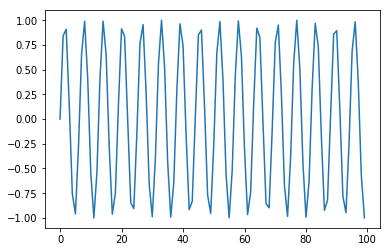

In [60]:
import matplotlib.pyplot as pyplot

x = np.arange(0,100)
y = np.sin(x)

pyplot.plot(x,y)
plot.show()

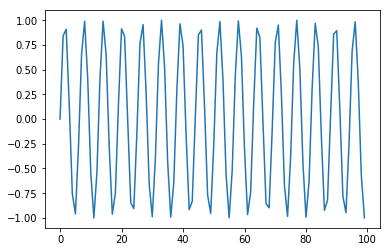

In [57]:
model_fit = model.fit()

## Calculations required for some of the plots:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

hie_data = dataTrain
corr_matrix = np.corrcoef(hie_data)
sm.graphics.plot_corr_grid([corr_matrix] * 8, xnames=hie_data.columns)
plt.show()

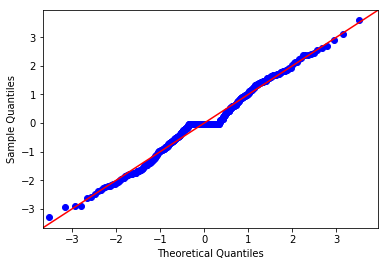

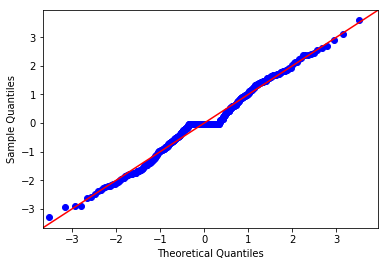

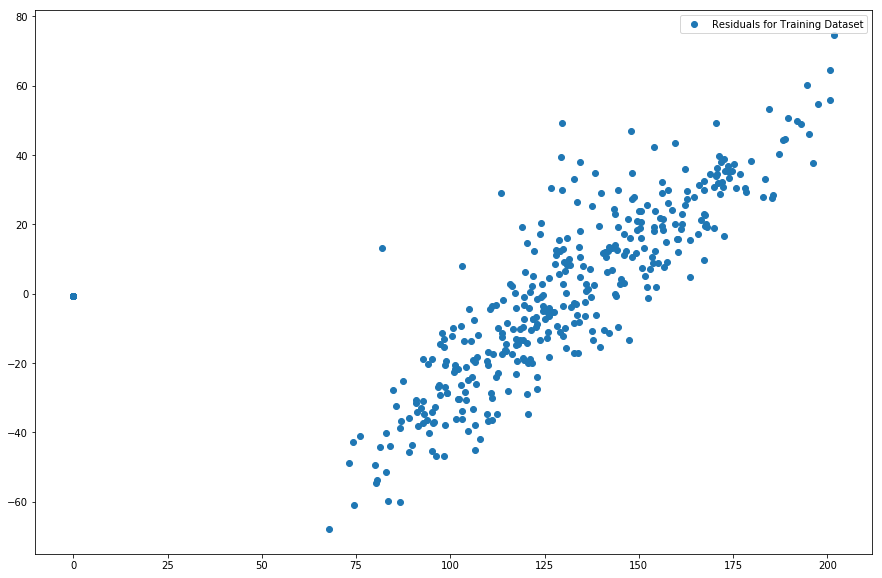

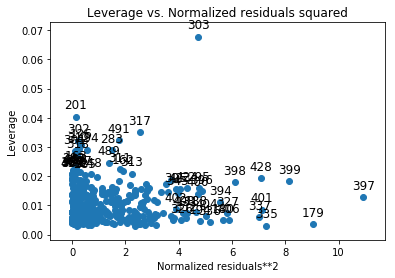

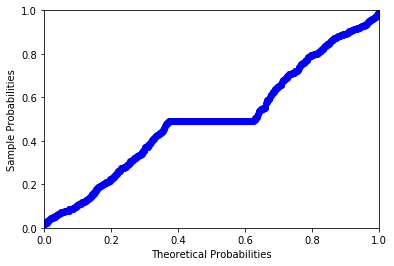

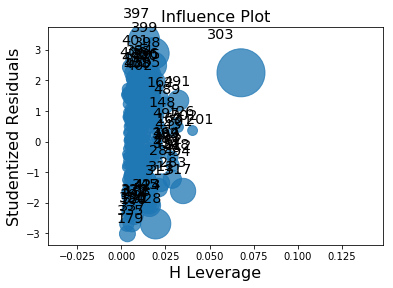

In [46]:
import scipy.stats as stats
res = model.resid
# smgraph.gofplots.qqplot(res)
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plot.show()

probplot = sm.ProbPlot(res, stats.t, fit=True)
fig2 = probplot.qqplot(line='45')
plt.show()

# Plot the stuff
plot.figure(figsize=(15,10))
# Residuals
plot.plot(referenceTrain, res, 'o',  label = 'Residuals for Training Dataset')

plot.legend(loc ='best')
plot.show()

fig = smgraph.regressionplots.plot_leverage_resid2(model)
plot.show()

probplot = sm.ProbPlot(res, stats.t, distargs=(4,))
fig = probplot.ppplot()
plt.show()

fig = smgraph.regressionplots.influence_plot(model)
plot.show()



In [26]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model, dataframeTrain.loc[:,REF].name,fig=fig)

ValueError: 'CO_MICS_RAW_STATION_CASE' is not in list

<Figure size 864x576 with 0 Axes>

## ML

In [ ]:
# Combine all data in one dataframe
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from test_utils import combine_data
import ipywidgets as widgets

selectedRef = tuple()
def selectRef(x):
    global selectedRef
    selectedRef = x

selectedFeatures = tuple()
def selectFeatures(x):
    global selectedFeatures
    selectedFeatures = list(x)

def show_channels_model(x):
    list_ref = list()
    list_feat = list()

    for column in readings[tests.value]['devices'][name_combined_data]['data'].columns:

        if any(name in column for name in x):

            if 'REF' in column: 
                list_ref.append(column)
            elif ad_append in column:
                list_ref.append(column)
        list_feat.append(column)
    reference_select.options = list_ref
    features_select.options = list_feat

def show_devices(x):
    devices_list = []
    for device in readings[tests.value]['devices']:
        if device != name_combined_data:
            devices_list.append(device)
    devices_select.options = devices_list

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

def prepare_dataframe_supervised(b):
    clear_output()
    
    # Define some globals
    global algorithm_option
    global reframed
    global scaler
    global values
    global train_X
    global train_y
    global test_X
    global test_y
    global n_predicted_features
    global n_features
    global n_lags
    
    # Take the algorithm and number of lags
    algorithm_option = algorithm_option_drop.value
    n_lags = n_lags_slider.value
    
    # join List
    list_all = list()
    list_all.append(selectedRef)
    
    for feature in selectedFeatures: 
        if feature != selectedRef:
            list_all.append(feature)
    
    # print list_all
    
    # get selected values from list
    dataframeSupervised = readings[tests.value]['devices'][name_combined_data]['data'].loc[:,list_all]
    dataframeSupervised = dataframeSupervised.dropna()
    values = dataframeSupervised.values
    
    # ensure all data is float
    values = values.astype('float32')
    if algorithm_option == 'LSTM_lagged_prediction':
        n_features = len(list_all)
        n_obs = n_lags * n_features
        
        ## Option example (lag 1 and lagged prediction as feature)
        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))
        # print 'values shape {}'.format(values.shape)
        scaled = scaler.fit_transform(values)
        # reframe as supervised learning
        reframed = series_to_supervised(scaled, n_lags, 1)
        # drop columns we don't want
        if n_lags == 1:
            print 'Dropping columns since lag is 1'
            reframed.drop(reframed.columns[range(len(list_all)+1, 2*len(list_all))], axis=1, inplace=True)
            n_predicted_features = 1
        else:
            n_predicted_features = n_features
        # print reframed.head(5)

        # split into train and test sets
        valuesReframed = reframed.values
        train = valuesReframed[:n_train_periods, :]
        test = valuesReframed[n_train_periods:, :]
        # split into input and outputs
        train_X, train_y = train[:, :-n_predicted_features], train[:, -n_predicted_features]
        test_X, test_y = test[:, :-n_predicted_features], test[:, -n_predicted_features]
        print 'Features + Reference length {}, predicted features length: {}'.format(len(list_all), n_predicted_features)
        print 'Training X, y and Test X, y shapes before reshaping'
        print (train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], n_lags, n_features))
        test_X = test_X.reshape((test_X.shape[0], n_lags, n_features))
        print 'Training X, y and Test X, y shapes after reshaping'
        print (train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        
    elif algorithm_option == 'LSTM_regression_single' or algorithm_option == 'LSTM_regression_deep':
        n_features = len(list_all) - 1
        n_obs = n_lags * n_features
        print 'n_features {}'.format(n_features)
        print 'n_obs {}'.format(n_obs)
        
        ## Option sensor 1 (lag 1 and no lagged prediction as feature)
        reframed = series_to_supervised(values, n_lags, 1)
        
        # drop columns we don't want
        if n_lags == 1:
            reframed = reframed.iloc[:,1:-n_features]
            n_predicted_features= 1
        else:
            # reframed_drop = reframed.iloc[:,1:]
            reframed.drop(reframed.columns[range(0,(n_features+1)*n_lags,n_features+1)], axis=1, inplace=True)
            reframed.drop(reframed.columns[range(n_obs+1, n_obs+n_features+1)], axis=1, inplace=True)
            n_predicted_features = 1
            
        values_drop = reframed.values

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values_drop)

        # split into train and test sets
        train = scaled[:n_train_periods, :]
        test = scaled[n_train_periods:, :]

        # split into input and outputs
        train_X, train_y = train[:, :-n_predicted_features], train[:, -n_predicted_features]
        test_X, test_y = test[:, :-n_predicted_features], test[:, -n_predicted_features]

        print 'Training X, y and Test X, y shapes before reshaping'
        print (train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], n_lags, n_features))
        test_X = test_X.reshape((test_X.shape[0], n_lags, n_features))
        print 'Training X, y and Test X, y shapes after reshaping'
        print (train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    print 'DataFrame has been reframed and prepared for supervised learning'
    print 'Reference is: {}'.format(selectedRef)
    print 'Features are: {}'.format([i for i in selectedFeatures])
    print 'Traning X Shape {}, Training Y Shape {}, Test X Shape {}, Test Y Shape {}'.format(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    

n_train_periods = 600
_Layout = widgets.Layout(width='700px')
algorithm_options = ['arima', 'LSTM_lagged_prediction', 'LSTM_regression_single', 'LSTM_regression_deep']
algorithm_option_drop = widgets.Dropdown(options = algorithm_options, 
                                         layout=_Layout,
                                         description = 'Algorithm')

n_lags_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='Lags:',
                                  continuous_update=False,
                                  orientation='horizontal',
                                  readout=True,
                                  readout_format='d')
 
# Dropdown test
layout = widgets.Layout(width='400px')
tests = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=_Layout,
                        description = 'Test')

tests_drop = widgets.interactive(show_devices, 
                                x = tests, 
                                layout=layout)

devices_select = widgets.SelectMultiple(description = 'Device',
                                        layout=_Layout)

devices_select_int = widgets.interactive(show_channels_model,
                                         x = devices_select,
                                         layout=_Layout)

# Multi-select for features and and single select for reference
reference_select = widgets.Dropdown(description = 'Select Reference',
                                          layout=_Layout)

features_select = widgets.SelectMultiple(description = 'Select Features',
                                         layout=_Layout)

ref_select_int = widgets.interactive(selectRef, x = reference_select)

feat_select_int = widgets.interactive(selectFeatures, x = features_select)

prep_data = widgets.Button(description='Prepare DataFrame')
prep_data.on_click(prepare_dataframe_supervised)

_HBox = widgets.HBox([algorithm_option_drop, n_lags_slider])
_VBox = widgets.VBox([tests_drop, devices_select_int, reference_select, features_select])
_Box = widgets.VBox([_VBox, _HBox, prep_data])
display(widgets.HTML('<hr><h4>Data preparation for model</h4>'))
display(_Box)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from matplotlib import pyplot

import statsmodels.api as sm

# design network
if algorithm_option == 'LSTM_lagged_prediction' or algorithm_option == 'LSTM_regression_single':
    model = Sequential()
    n_neurons = 100
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(1))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    
elif algorithm_option == 'LSTM_regression_deep':
    model = Sequential()
    layers = [50, 100, 1]
    model.add(LSTM(layers[0], return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(layers[1], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=layers[2]))
    model.add(Activation("linear"))
    model.compile(loss='mse', optimizer='rmsprop')
    
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    
elif algorithm_option == 'arima':
    
    model = sm.tsa.SARIMAX(endog = train_y,
                           exog = train_X,
                           order= (7,0,7),
                           enforce_invertibility=False,
                           enforce_stationarity=False,
                           trend='c')
                    
    results = model.fit(disp=0)
                    

    inv_y = test_y
    prediction = results.get_prediction(full_results=True,
                                    alpha=0.05)
    
    forecast = results.get_forecast(test_y.shape[0], 
                                    exog=test_X)
    
    inv_yhat_prediction = prediction.predicted_mean
    inv_yhat = forecast.predicted_mean

    # Get your prediction intervals by alpha parameter. alpha=0.05 implies 95% CI
    inv_yhat_cis_prediction = prediction.conf_int(alpha=0.05)
    inv_yhat_cis = forecast.conf_int(alpha=0.05)
    print(results.summary())


In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from math import sqrt
import numpy as np

# invert scaling for forecast
if algorithm_option == 'LSTM_lagged_prediction':
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2] * n_lags))
    print 'LSTM_regression model used, scaling back'
    if n_predicted_features == 1:
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
    else: 
        inv_yhat = concatenate((yhat, test_X[:, -(n_predicted_features-1):]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, -(n_predicted_features-1):]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]  
elif algorithm_option == 'LSTM_regression_deep' or algorithm_option == 'LSTM_regression_single':
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2] * n_lags))
    print 'LSTM_regression model used, scaling back'
    if n_predicted_features == 1:
        inv_yhat = concatenate((test_X[:, :], yhat), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,-1]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_X[:, :], test_y), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,-1]
    print inv_y.shape

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Plot the stuff
pyplot.figure(figsize=(15,10))
# Actual data
pyplot.plot(np.arange(train_X.shape[0],train_X.shape[0] + test_X.shape[0]), inv_y, label = 'Actual')
# Forecast
pyplot.plot(np.arange(train_X.shape[0],train_X.shape[0] + test_X.shape[0]), inv_yhat, label = 'Forecast')

if algorithm_option == 'arima':
    # In sample prediction
    pyplot.plot(np.arange(0, train_X.shape[0]), inv_yhat_prediction, lw = 1, label = 'In sample Prediction')
    # In sample prediction confidence intervals
    pyplot.plot(np.arange(0, train_X.shape[0]), inv_yhat_cis_prediction , lw =0.5, color='red', alpha = 0.5, label='SARIMAX prediction CI')
    pyplot.fill_between(np.arange(0, train_X.shape[0]), inv_yhat_cis_prediction.iloc[:,0], inv_yhat_cis_prediction.iloc[:,1], alpha = 0.05 )
    # Out of sample forecast Confidence intervals
    pyplot.plot(np.arange(train_X.shape[0],train_X.shape[0] + test_X.shape[0]),inv_yhat_cis, lw=1, color="black", alpha=0.5, label='SARIMAX forecast CI')
    pyplot.fill_between(np.arange(train_X.shape[0],train_X.shape[0] + test_X.shape[0]), inv_yhat_cis.iloc[:, 0], inv_yhat_cis.iloc[:, 1], alpha=0.05)

pyplot.xlabel('Index (-)')

pyplot.legend(loc ='best')
pyplot.show()

## Feature selection and data training split

The following code uses cross validation on rolling basis structure:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

In [ ]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

## sklearn Time Series functions and data split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

## Metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error#, mean_squared_log_error 

### TODO Preliminary Checks

#### TODO Dicker-fuller test (ADF)

Use this test to verify **data stationarity**.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
ad_fuller_results = sm.tsa.stattools.adfuller(df['NOX ug/m3'])

adf = ad_fuller_results[0]
pvalue = ad_fuller_results[1]
usedlag = ad_fuller_results[2]
nobs = ad_fuller_results[3]
print ('ADF- Statistic: {}\npvalue: {}\nUsed Lag: {}\nnobs: {}\n'.format(adf, pvalue, usedlag, nobs))

#### TODO Granger Casuality Test

Use this test to determine the casuality of variables (which causes the other)

In [ ]:
print(sm.tsa.stattools.grangercausalitytests(df[['NOX ug/m3','NO ug/m3']].dropna(),1))

# R Framework

## Initialise environment

In [ ]:
## Include R in Python Notebook and test it out below - do not modify the first line (%%R -i ...)
%load_ext rpy2.ipython

In [ ]:
## CRAN mirror for use in this session
# Secure CRAN mirrors

#1: 0-Cloud [https]                   2: Algeria [https]
#3: Australia (Canberra) [https]      4: Australia (Melbourne 1) [https]
#5: Australia (Melbourne 2) [https]   6: Australia (Perth) [https]
#7: Austria [https]                   8: Belgium (Ghent) [https]
#9: Brazil (PR) [https]              10: Brazil (RJ) [https]
#11: Brazil (SP 1) [https]            12: Brazil (SP 2) [https]
#13: Bulgaria [https]                 14: Chile 1 [https]
#15: Chile 2 [https]                  16: China (Guangzhou) [https]
#17: China (Lanzhou) [https]          18: China (Shanghai) [https]
#19: Colombia (Cali) [https]          20: Czech Republic [https]
#21: Denmark [https]                  22: East Asia [https]
#23: Ecuador (Cuenca) [https]         24: Ecuador (Quito) [https]
#25: Estonia [https]                  26: France (Lyon 1) [https]
#27: France (Lyon 2) [https]          28: France (Marseille) [https]
#29: France (Montpellier) [https]     30: France (Paris 2) [https]
#31: Germany (Erlangen) [https]       32: Germany (Göttingen) [https]
#33: Germany (Münster) [https]        34: Greece [https]
#35: Iceland [https]                  36: India [https]
#37: Indonesia (Jakarta) [https]      38: Ireland [https]
#39: Italy (Padua) [https]            40: Japan (Tokyo) [https]
#41: Japan (Yonezawa) [https]         42: Korea (Ulsan) [https]
#43: Malaysia [https]                 44: Mexico (Mexico City) [https]
#45: Norway [https]                   46: Philippines [https]
#47: Serbia [https]                   48: Spain (A Coruña) [https]
#49: Spain (Madrid) [https]           50: Sweden [https]
#51: Switzerland [https]              52: Turkey (Denizli) [https]
#53: Turkey (Mersin) [https]          54: UK (Bristol) [https]
#55: UK (Cambridge) [https]           56: UK (London 1) [https]
#57: USA (CA 1) [https]               58: USA (IA) [https]
#59: USA (KS) [https]                 60: USA (MI 1) [https]
#61: USA (NY) [https]                 62: USA (OR) [https]
#63: USA (TN) [https]                 64: USA (TX 1) [https]
#65: Vietnam [https]                  66: (other mirrors)

## Install dependencies

In [ ]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

base = rpackages.importr('base')
utils = rpackages.importr('utils')
# select a mirror for R packages
utils.chooseCRANmirror(ind=49) # select the first mirror in the list

# R package names
packnames = ["ggplot2",
             "car",
             "lattice",
             "dyn",
             "dynlm",
             "zoo",
             "tseries",
             "lmtest",
             "xts",
             "tidyverse",
             "lubridate",
             "lme4",
             "multcomp",
             "signal",
             "ggfortify"]

# Selectively install what needs to be install.
for x in packnames:
    if not rpackages.isinstalled(x):
        utils.install_packages(StrVector(x))

# import R's "GlobalEnv" to evaluate the function
from rpy2.robjects import globalenv

# ggplot2 = rpackages.importr('ggplot2')
# graphics = rpackages.importr('graphics')

## Load in R libraries

In [ ]:
%%R

# Load in the libraries
library("ggplot2")
library("car")
library("lattice")
library("dyn")
library("dynlm")
library("zoo")
library("tseries")
library("lmtest")
library("xts")
library("tidyverse")
library("lubridate")
library("lme4")
library("multcomp")
library("signal")
library('GGally')
library('plotly')


## Export Data to R Dataframe

In [ ]:
setLimits = False
maxY = 15000
minY = 0
toshow = []
min_date_training = 0
max_date_training = 0
min_date_eval = 0
max_date_eval = 0

def show_sensors(Source):
    _sensor_drop.options = [s for s in list(readings[Source].columns)]
    _sensor_drop.source = Source
    _min_date_training.value = readings[Source].index.min()._short_repr
    _max_date_training.value = readings[Source].index.max()._short_repr
    _min_date_eval.value = readings[Source].index.min()._short_repr
    _max_date_eval.value = readings[Source].index.max()._short_repr
    
    #for k in readings.keys():
    #    _min_date_training.value = min(_min_date_training.value, readings[k].index.min()._short_repr)
    #    _max_date_training.value = max(_max_date_training.value, readings[k].index.max()._short_repr)
    #    _min_date_eval.value = min(_min_date_eval.value,readings[k].index.min()._short_repr)
    #    _max_date_eval.value = max(_max_date_eval.value,readings[k].index.max()._short_repr)
      
    
def clear_all(b):
    clear_output()
    del toshow[:]

def add_sensor(b):
    clear_output()
    d = [_sensor_drop.source, _sensor_drop.value]
    
    if d not in toshow: 
        toshow.append(d)
        
    global dataframe_export
    dataframe_export = readings[toshow[0][0]].loc[:,(toshow[0][1],)]
    
    #if b.slice_time:
    #    dataframe_export = dataframe_export[dataframe_export.index > min(_min_date_training.value,_min_date_eval.value)]
    #    dataframe_export = dataframe_export[dataframe_export.index < max(_max_date_training.value,_max_date_eval.value)]
    
    #for k in readings.keys():
    #    _min_date_training.value = min(_min_date_training.value, readings[k].index.min()._short_repr)
    #    _max_date_training.value = max(_max_date_training.value, readings[k].index.max()._short_repr)
    #    _min_date_eval.value = min(_min_date_eval.value,readings[k].index.min()._short_repr)
    #    _max_date_eval.value = max(_max_date_eval.value,readings[k].index.max()._short_repr)
    
    dataframe_export = dataframe_export[dataframe_export.index > min(_min_date_training.value,_min_date_eval.value)]
    dataframe_export = dataframe_export[dataframe_export.index < max(_max_date_training.value,_max_date_eval.value)]
    
    #print 'Min Date Training / Eval'
    #print _min_date_training.value
    #print _min_date_eval.value
    #print min(_min_date_training.value,_min_date_eval.value)
    #print 'Max Date Training / Eval'
    #print _max_date_training.value
    #print _max_date_eval.value
    #print max(_max_date_training.value,_max_date_eval.value)
    
    if len(toshow) > 1:
        for i in range(1, len(toshow)):
            dataframe_export = pd.merge(dataframe_export, readings[toshow[i][0]].loc[:,(toshow[i][1],)], left_index=True, right_index=True)

    # Change columns naming
    changed = []
    
    for i in range(len(dataframe_export.columns)):
        changed.append(toshow[i][0] + '-'+ dataframe_export.columns[i])
    dataframe_export.columns = changed
    
    #text=[i  for i in range(len(dataframe_export.columns))]
    #for i in range(len(dataframe_export.columns)):
    #    item = dataframe_export.columns[i]
    #    #print "data" + str(i)
    #    #print item
    #    fileName = item[:item.find('.')]
    #    #print fileName
    #    channel = item[item.find('-')+1:].split('-')[0]
    #    if (len(item[item.find('-')+1:].split('-'))>0):
    #        unit = item[item.find('-')+1:].split('-')[1]
    #    else:
    #        unit = ''
    #    #print channel
    #    #print unit
    #    text[i]='<br>File: '+'{:s}'+str(fileName)+'<br>Channel: '+'{:s}'+str(channel)+\
    #    '<br>Unit: '+'{:s}'+ str(unit)
    #    #print text[i]
    
    fig2 = tls.make_subplots(rows=1, cols=1, shared_xaxes=True)
    for i in range(len(dataframe_export.columns)):
        fig2.append_trace({'x': dataframe_export.index, 
                          'y': dataframe_export.iloc[:,i], 
                          'type': 'scatter',
                          'name': dataframe_export.columns[i]}, 1, 1)


    fig2['layout'].update(
        height=800,
        showlegend = True,
        legend=dict(x=-.1, y=5) ,
        xaxis=dict(
            rangeslider=dict(),
            type='date'
        ),
        annotations=[dict(
                        x=_min_date_training.value,
                        y=1,
                        xref='x',
                        yref='paper',
                        text='Training Dataset',
                        showarrow=False,
                        xanchor="left",
                        font=dict(color= 'rgba(44, 160, 101, 1)')
                    ),
                     dict(
                        x=_min_date_eval.value,
                        y=0.95,
                        xref='x',
                        yref='paper',
                        text='Evaluation Dataset',
                        showarrow=False,
                        xanchor="left",
                        font=dict(color= 'rgba(160, 160, 0, 1)')
                    )
                    ],
        shapes=[
                dict(type='rect',
                    layer='below',
                    x0=_min_date_training.value,
                    x1=_max_date_training.value,
                    y0=0.95,
                    y1=1,
                    yref= "paper",
                    fillcolor='rgba(44, 160, 0, 0.2)',
                    line=dict(color= 'rgba(44, 160, 101,0.6)'),
                    ),
                dict(type='rect',
                    layer='below',
                    x0=_min_date_eval.value,
                    x1=_max_date_eval.value,
                    y0=0.9,
                    y1=0.95,
                    yref= "paper",
                    fillcolor='rgba(160, 160, 0, 0.2)',
                    line=dict(color= 'rgba(160, 160, 0, 0.6)')
                )
        ]
    )
    
    #fig1 = dataframe_export.iplot(kind='scatter', asFigure=True, layout = layout, hoverinfo='text')
    #ply.offline.iplot(fig1)
    
    print (list(dataframe_export.columns.values.tolist()))
    
    ply.offline.iplot(fig2)

def reset_time_t(b):
    _min_date_training.value = readings[b.src.value].index.min()._short_repr
    _max_date_training.value = readings[b.src.value].index.max()._short_repr
    add_sensor(b)
    
def reset_time_e(b):
    _min_date_eval.value = readings[b.src.value].index.min()._short_repr
    _max_date_eval.value = readings[b.src.value].index.max()._short_repr
    add_sensor(b)

def export_dataFrame(b):
    clear_output()
    from rpy2.robjects import pandas2ri
    from rpy2.robjects import r
    
    global r_train_dataframe, train_dataframe, r_eval_dataframe, eval_dataframe

    train_dataframe = dataframe_export[dataframe_export.index > _min_date_training.value]
    train_dataframe = train_dataframe[train_dataframe.index < _max_date_training.value]
    train_dataframe.index=train_dataframe.index.to_datetime()
    r_train_dataframe = pandas2ri.py2ri(train_dataframe)
    
    eval_dataframe = dataframe_export[dataframe_export.index > _min_date_eval.value]
    eval_dataframe = eval_dataframe[eval_dataframe.index < _max_date_eval.value]
    eval_dataframe.index=eval_dataframe.index.to_datetime()
    r_eval_dataframe = pandas2ri.py2ri(eval_dataframe)
    
    %Rpush r_train_dataframe r_eval_dataframe
    
    print ('Export to R Training dataframe successful with following channels')
    %R print(colnames(r_train_dataframe))
    min_date_training = _min_date_training.value
    max_date_training= _max_date_training.value
    
    print ('With Date Range')
    print (min_date_training)
    print (max_date_training)
    
    print ''
   
    print ('Export to R Evaluation dataframe successful with following channels')
    %R print(colnames(r_eval_dataframe))
    min_date_eval = str(_min_date_eval.value)
    max_date_eval= str(_max_date_eval.value)

    print ('With Date Range')
    print (min_date_eval)
    print (max_date_eval)
        
    refFile = str(_refList.value)
    refFile = refFile[:refFile.find('.')]
    
    print ('')
    
    print ('Reference Dataset')
    print (refFile)
    r_train_columns_renamed = False
    r_eval_columns_renamed = False
    %Rpush refFile r_train_columns_renamed r_eval_columns_renamed

_layout=widgets.Layout(width='330px')

_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=_layout)
_kit_drop = widgets.interactive(show_sensors, Source=_kit, layout=_layout)

_b_add = widgets.Button(description='Update plot', layout=widgets.Layout(width='100px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False

_sensor_drop = widgets.Dropdown(layout=_layout)
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='100px'))
_b_reset_all.on_click(clear_all)

_b_reset_time_t = widgets.Button(description='Reset Training Dates', layout=widgets.Layout(width='200px'))
_b_reset_time_t.on_click(reset_time_t)
_b_reset_time_t.src = _kit

_b_reset_time_e = widgets.Button(description='Reset Eval Dates', layout=widgets.Layout(width='200px'))
_b_reset_time_e.on_click(reset_time_e)
_b_reset_time_e.src = _kit

_min_date_training = widgets.Text(description='Start Date Train:', layout=widgets.Layout(width='250px'))
_max_date_training = widgets.Text(description='End Date Train:', layout=widgets.Layout(width='250px'))
_min_date_eval = widgets.Text(description='Start Date Eval:', layout=widgets.Layout(width='250px'))
_max_date_eval = widgets.Text(description='End Date Eval:', layout=widgets.Layout(width='250px'))

#_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
#_b_apply_time.on_click(add_sensor)
#_b_apply_time.slice_time = True

#_b_export = widgets.Button(description='Export to CSV', layout=widgets.Layout(width='150px'))
#_b_export.on_click(export_dataFrame)
_c_R = widgets.Button(description='Export to R dataframe', layout=widgets.Layout(width='150px'))
_c_R.on_click(export_dataFrame)
#_exportPath = widgets.Text(description = 'Type in export path  ', layout=widgets.Layout(width='600px'))
#_fileName = widgets.Text(description = 'Name ', layout=widgets.Layout(width='200px'))

_button_box = widgets.HBox([_b_add, _b_reset_all])
_sensor_box = widgets.HBox([_kit_drop, _sensor_drop , _button_box])
_timeT_box = widgets.HBox([_min_date_training,_max_date_training, _b_reset_time_t])
_timeE_box = widgets.HBox([_min_date_eval,_max_date_eval, _b_reset_time_e])

#_name_box = widgets.HBox([_b_export, _exportPath, _fileName])
#_root_box = widgets.VBox([_time_box, _sensor_box, _name_box, _button_box])

_refList = widgets.RadioButtons(
    options=[k for k in readings.keys()],
    #rows=10,
    description='Reference Sensor File',
    disabled=False,
    layout=widgets.Layout(width='400px'),
)

_cR = widgets.Button(description='Export datasets to R', layout=widgets.Layout(width='200px'))
_cR.on_click(export_dataFrame)
#_prev_dataset = widgets.Button(description='Preview Datasets', layout=widgets.Layout(width='250px'))
#_prev_dataset.on_click(preview_datasets)
_button_box = widgets.HBox([_refList,_cR])
_root_box = widgets.VBox([_sensor_box, _timeT_box, _timeE_box, _button_box])
display(widgets.HTML('<br>'))

display(widgets.HTML('<h3>Use this box to create R compatible dataframes</h3>'))
display(widgets.HTML('1. Select the signals from each source, and hit Preview Slice'))
display(widgets.HTML('2. Apply dates from and to export trim'))
display(widgets.HTML('3. Hit export to DataFrame'))
display(widgets.HTML('<br>'))
display(_root_box)



### Renaming and timestamp reading

In [ ]:
%%R

#print(r_train_columns_renamed)
#print(refFile)

convertNames <- function(dataset){
    for (i in colnames(dataset)){
        #print(i)
        index <- gregexpr('.csv.',i, fixed = TRUE)
        #print(index)
        #print('-')
        fileName=substr(i, start=1, stop=index)
        fileName=substr(fileName,start=1,stop=nchar(fileName)-1)
        channel=substr(i, start=nchar(fileName)+6, stop=nchar(i))
        #print('FileName')
        #print(fileName)
        #print('Channel')
        #print(channel)
        
        if (fileName==refFile){
            #fileName=paste('REF',fileName,sep="-")
            fileName='REF'
            #print('Reference Dataset')
        } else {
            #fileName='CORR'
        }

        if (grepl('Carbon.monoxide.kOhm.ppm.sm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Carbon.monoxide.kOhm.ppm.sm',channel),nchar(channel)),'KIT_CO_RAW_SM',channel),sep="_")
        } else if (grepl('Carbon.monoxide.kOhm.ppm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Carbon.monoxide.kOhm.ppm',channel),nchar(channel)),'KIT_CO_RAW',channel),sep="_")
        } else if (grepl('Carbon.monoxide.sm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Carbon.monoxide.sm',channel),nchar(channel)),'KIT_CO_PPM_SM',channel),sep="_")
        } else if (grepl('Carbon.monoxide',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Carbon.monoxide',channel),nchar(channel)),'KIT_CO_PPM',channel),sep="_")
        } else if (grepl('Nitrogen.dioxide.kOhm.ppm.sm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Nitrogen.dioxide.kOhm.ppm.sm',channel),nchar(channel)),'KIT_NO2_RAW_SM',channel),sep="_")
        } else if (grepl('Nitrogen.dioxide.kOhm.ppm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Nitrogen.dioxide.kOhm.ppm',channel),nchar(channel)),'KIT_NO2_RAW',channel),sep="_")
        } else if (grepl('Nitrogen.dioxide.sm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Nitrogen.dioxide.sm',channel),nchar(channel)),'KIT_NO2_PPM_SM',channel),sep="_")
        } else if (grepl('Nitrogen.dioxide',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Nitrogen.dioxide',channel),nchar(channel)),'KIT_NO2_PPM',channel),sep="_")
        } else if (grepl('AlphaDelta.Humidity..',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.Humidity..',channel),nchar(channel)),'AD_H_PRCT',channel),sep="_")
        } else if (grepl('AlphaDelta.Humidity',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.Humidity',channel),nchar(channel)),'AD_H_PRCT',channel),sep="_")
        } else if (grepl('Humidity..',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Humidity..',channel),nchar(channel)),'KIT_H_PRCT',channel),sep="_")
        } else if (grepl('Humidity',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Humidity',channel),nchar(channel)),'KIT_H_PRCT',channel),sep="_")
        } else if (grepl('AlphaDelta.Humidity',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.Humidity',channel),nchar(channel)),'KIT_H_PRCT',channel),sep="_")
        } else if (grepl('AlphaDelta.Temperature.C',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.Temperature.C',channel),nchar(channel)),'AD_T_C',channel),sep="_")
        } else if (grepl('AlphaDelta.Temperature',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.Temperature',channel),nchar(channel)),'AD_T_C',channel),sep="_")
        } else if (grepl('Temperature.C',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Temperature.C',channel),nchar(channel)),'KIT_T_C',channel),sep="_")
        } else if (grepl('Temperature',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Temperature.C',channel),nchar(channel)),'KIT_T_C',channel),sep="_")
        } else if (grepl('Battery..',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('Battery..',channel),nchar(channel)),'BATT_R',channel),sep="_")
        } else if (grepl('AlphaDelta.1W.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.1W.mV',channel),nchar(channel)),'AD_1W_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.1A.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.1A.mV',channel),nchar(channel)),'AD_1A_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.2W.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.2W.mV',channel),nchar(channel)),'AD_2W_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.2A.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.2A.mV',channel),nchar(channel)),'AD_2A_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.3W.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.3W.mV',channel),nchar(channel)),'AD_3W_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.3A.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.3A.mV',channel),nchar(channel)),'AD_3A_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.3A.mV',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.3A.mV',channel),nchar(channel)),'AD_3A_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.1cal.ppm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.1cal.ppm',channel),nchar(channel)),'AD_CO_PPM_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.2cal.ppm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.2cal.ppm',channel),nchar(channel)),'AD_NO2_PPM_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.3cal.ppm',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.3cal.ppm',channel),nchar(channel)),'AD_O3_PPM_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta_CO_SM',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta_CO_SM',channel),nchar(channel)),'AD_CO_PPM_SM',channel),sep="_")
        } else if (grepl('AlphaDelta.CO',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.CO',channel),nchar(channel)),'AD_CO_PPM_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta_NO2_SM',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta_NO2_smooth',channel),nchar(channel)),'AD_NO2_PPM_SM',channel),sep="_")
        } else if (grepl('AlphaDelta.NO2',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.NO2',channel),nchar(channel)),'AD_NO2_PPM_RAW',channel),sep="_")
        } else if (grepl('AlphaDelta.OX',channel)){
            newName = paste(fileName,gsub(channel,substr(channel,regexpr('AlphaDelta.OX',channel),nchar(channel)),'AD_O3_PPM_RAW',channel),sep="_")
        }

        #print(newName)
        #name[i]<-newName
        #colnames(r_train_dataframe) <- paste(fileName,"-",channel)
        colnames(dataset)[colnames(dataset) == i] <- newName
        #print('----')
    }
    return(dataset)
}

if (!r_train_columns_renamed){
    print('Time format for Training Dataset')
    r_train_dataframe = read.zoo(r_train_dataframe, index = "Time",
      format = "%Y-%m-%d %H:%M:00", tz = "GMT+2")
    print(time(r_train_dataframe)[1])

    r_train_dataframe=convertNames(r_train_dataframe)
    r_train_columns_renamed = TRUE 
}

if (!r_eval_columns_renamed){
    print('Time format for Evaluation Dataset')
    r_eval_dataframe = read.zoo(r_eval_dataframe, index = "Time",
      format = "%Y-%m-%d %H:%M:00", tz = "GMT+2")
    print(time(r_eval_dataframe)[1])
    r_eval_dataframe=convertNames(r_eval_dataframe)
    r_eval_columns_renamed = TRUE 
}

print('Renamed Training Dataset Columns')
print(colnames(r_train_dataframe))
print('Renamed Eval Dataset Columns')
print(colnames(r_eval_dataframe))


## Data Exploration

### Pairs Plot

In [ ]:
%%R -w 800 -h 500
print(colnames(r_train_dataframe))

In [ ]:
%%R -w 800 -h 600
options(warn=-1)
fileNamePairs = 'KIT_1_4574_MICS'

p_train<-ggpairs(data=r_train_dataframe, # data.frame with variables
             columns=c(2,3,4,6,8), # columns to plot, default to all.
             title="Pairs Plot For Training Dataset")
pp_train<-p_train+theme(axis.text=element_text(size=8),
        axis.title=element_text(size=6))
print(pp_train)

#pp_train_plotly<-ggplotly(pp_train)
#print(pp_train_plotly)

p_eval<-ggpairs(data=r_eval_dataframe, # data.frame with variables
             columns=c(2,3,4), # columns to plot, default to all.
             title="Pairs Plot For Eval Dataset")
pp_eval<-p_eval+theme(axis.text=element_text(size=8),
        axis.title=element_text(size=6))
print(pp_eval)

#pp_eval_plotly <- ggplotly(pp_eval)
#print(pp_eval_plotly)

options(warn=0)

### Eval DataFrame
#pairs(~r_eval_dataframe[,"REF_KIT_CO_RAW"]+
#      r_eval_dataframe[,"REF_KIT_NO2_RAW"]+
#      r_eval_dataframe[,paste(fileNamePairs,"KIT_CO_RAW",sep="_")])

### Coplot

In [ ]:
%%R -w 700 -h 700

p<-coplot(r_train_dataframe[,"REF_AD_CO_PPM_SM"] ~ 
          r_train_dataframe[,"KIT_1_4574_KIT_CO_RAW_SM"] | 
          r_train_dataframe[,"KIT_1_4574_KIT_H_PRCT"] + 
          r_train_dataframe[,"REF_AD_T_PRCT"])

## Model Iterations

In [ ]:
%%R
print(colnames(r_train_dataframe))

In [ ]:
%%R -w 800 -h 500

library(ggfortify)

# Model 1 Names - Specify var and model names below
r_mod1_ref = "REF_AD_NO2_PPM_SM"
r_train_dataframe.mod1.name = "NO2_MICS_O(1)"
# Model 1 Formulation - Specify model below
r_train_dataframe.mod1 = dynlm(REF_AD_NO2_PPM_SM ~ KIT_1_4574_KIT_NO2_RAW_SM, 
                               data = r_train_dataframe)

# Model Reference
r_train_dataframe.mod1.reference= r_train_dataframe[,r_mod1_ref]
r_train_dataframe.mod1.reference.name = r_mod1_ref

print(summary(r_train_dataframe.mod1))

# Use Jarque Bera Test to check if the regression errors are normally 
# distributed for DW test (assumes that the regression errors are normally distributed)
# The p-value is the probability of the null hypotesis 
# (which for the Jarque Bera Test is that the distribution is normal)
print(jarque.bera.test(resid(r_train_dataframe.mod1)))

plot(resid(r_train_dataframe.mod1), xlab = "Date", main ="", type = "o")

# Check for autocorrelation of the residuals, 
# with DW test if the residuals are normally distributed
print(dwtest((r_train_dataframe.mod1), alternative = "two.sided"))

par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
autoplot(r_train_dataframe.mod1)
# https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864

In [ ]:
%%R -w 800 -h 500

library(ggfortify)

# Model 1 Names - Specify var and model names below
r_mod2_ref = "REF_AD_NO2_PPM_SM"
r_train_dataframe.mod2.name = "NO2_MICS_O(2)"
# Model 1 Formulation - Specify model below
r_train_dataframe.mod2 = dynlm(REF_AD_NO2_PPM_SM ~ KIT_1_4574_KIT_NO2_RAW_SM+I(KIT_1_4574_KIT_NO2_RAW_SM^2), 
                               data = r_train_dataframe)

# Model Reference
r_train_dataframe.mod2.reference= r_train_dataframe[,r_mod2_ref]
r_train_dataframe.mod2.reference.name = r_mod2_ref

print(summary(r_train_dataframe.mod2))

# Use Jarque Bera Test to check if the regression errors are normally 
# distributed for DW test (assumes that the regression errors are normally distributed)
# The p-value is the probability of the null hypotesis 
# (which for the Jarque Bera Test is that the distribution is normal)
print(jarque.bera.test(resid(r_train_dataframe.mod2)))

plot(resid(r_train_dataframe.mod2), xlab = "Date", main ="", type = "o")

# Check for autocorrelation of the residuals, 
# with DW test if the residuals are normally distributed
print(dwtest((r_train_dataframe.mod2), alternative = "two.sided"))

par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
autoplot(r_train_dataframe.mod2)
# https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864

In [ ]:
%%R -w 800 -h 500

library(ggfortify)

# Model 1 Names - Specify var and model names below
r_mod3_ref = "REF_AD_NO2_PPM_SM"
r_train_dataframe.mod3.name = "NO2_MICS_O(1) + H"
# Model 1 Formulation - Specify model below
r_train_dataframe.mod3 = dynlm(REF_AD_NO2_PPM_SM ~ KIT_1_4574_KIT_NO2_RAW_SM + KIT_1_4574_KIT_H_PRCT, 
                               data = r_train_dataframe)

# Model Reference
r_train_dataframe.mod3.reference= r_train_dataframe[,r_mod3_ref]
r_train_dataframe.mod3.reference.name = r_mod3_ref

print(summary(r_train_dataframe.mod3))

# Use Jarque Bera Test to check if the regression errors are normally 
# distributed for DW test (assumes that the regression errors are normally distributed)
# The p-value is the probability of the null hypotesis 
# (which for the Jarque Bera Test is that the distribution is normal)
print(jarque.bera.test(resid(r_train_dataframe.mod3)))

plot(resid(r_train_dataframe.mod3), xlab = "Date", main ="", type = "o")

# Check for autocorrelation of the residuals, 
# with DW test if the residuals are normally distributed
print(dwtest((r_train_dataframe.mod3), alternative = "two.sided"))

par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
autoplot(r_train_dataframe.mod3)
# https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864

In [ ]:
%%R -w 800 -h 500

library(ggfortify)

# Model 1 Names - Specify var and model names below
r_mod4_ref = "REF_AD_NO2_PPM_SM"
r_train_dataframe.mod4.name = "NO2_MICS_O(1) + T"
# Model 1 Formulation - Specify model below
r_train_dataframe.mod4 = dynlm(REF_AD_NO2_PPM_SM ~ KIT_1_4574_KIT_NO2_RAW_SM + KIT_1_4574_KIT_T_C, 
                               data = r_train_dataframe)

# Model Reference
r_train_dataframe.mod4.reference= r_train_dataframe[,r_mod4_ref]
r_train_dataframe.mod4.reference.name = r_mod4_ref

print(summary(r_train_dataframe.mod4))

# Use Jarque Bera Test to check if the regression errors are normally 
# distributed for DW test (assumes that the regression errors are normally distributed)
# The p-value is the probability of the null hypotesis 
# (which for the Jarque Bera Test is that the distribution is normal)
print(jarque.bera.test(resid(r_train_dataframe.mod4)))

plot(resid(r_train_dataframe.mod4), xlab = "Date", main ="", type = "o")

# Check for autocorrelation of the residuals, 
# with DW test if the residuals are normally distributed
print(dwtest((r_train_dataframe.mod4), alternative = "two.sided"))

par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
autoplot(r_train_dataframe.mod4)
# https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864

In [ ]:
%%R -w 800 -h 500

library(ggfortify)

# Model 1 Names - Specify var and model names below
r_mod5_ref = "REF_AD_NO2_PPM_SM"
r_train_dataframe.mod5.name = "NO2_MICS_O(1) + T + H"
# Model 1 Formulation - Specify model below
r_train_dataframe.mod5 = dynlm(REF_AD_NO2_PPM_SM ~ KIT_1_4574_KIT_NO2_RAW_SM + KIT_1_4574_KIT_T_C+KIT_1_4574_KIT_H_PRCT, 
                               data = r_train_dataframe)

# Model Reference
r_train_dataframe.mod5.reference= r_train_dataframe[,r_mod5_ref]
r_train_dataframe.mod5.reference.name = r_mod5_ref

print(summary(r_train_dataframe.mod5))

# Use Jarque Bera Test to check if the regression errors are normally 
# distributed for DW test (assumes that the regression errors are normally distributed)
# The p-value is the probability of the null hypotesis 
# (which for the Jarque Bera Test is that the distribution is normal)
print(jarque.bera.test(resid(r_train_dataframe.mod5)))

plot(resid(r_train_dataframe.mod5), xlab = "Date", main ="", type = "o")

# Check for autocorrelation of the residuals, 
# with DW test if the residuals are normally distributed
print(dwtest((r_train_dataframe.mod5), alternative = "two.sided"))

par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
autoplot(r_train_dataframe.mod5)
# https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864

### Model Diagnostics

More into detail for model diagnostics [here](https://www.statmethods.net/stats/rdiagnostics.html)
and [here](https://socialsciences.mcmaster.ca/jfox/Courses/Brazil-2009/index.html)

All the plots explanations are [here]( https://stats.stackexchange.com/questions/5135/interpretation-of-rs-lm-output).
As a rule of a thumb: if Pr(>|t|) is very small, means the value is significant - P-value < 0.05 is OK.

Use **Jarque Bera Test** to check if the regression errors are normally 
distributed for DW test (assumes that the regression errors are normally distributed). The p-value is the probability of the null hypotesis (which for the Jarque Bera Test is that the distribution is normal)

Check for autocorrelation of the residuals, with **DW Test** if the residuals are normally distributed: https://stats.stackexchange.com/questions/14914/how-to-test-the-autocorrelation-of-the-residuals

Here more information about the plots. [Link](https://stats.stackexchange.com/questions/58141/interpreting-plot-lm#65864)

General rules:

- **Residual vs Fitted**: we want a horizontal red line with homogeneus spread. It's a check for the heterodasticity of the distribution. If the residuals change is correlated with the fitted values or the original, our model assumptions are NOK (see https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions)
- **Scale location**: we want the red line horizontal - same check as above (see https://stats.stackexchange.com/questions/52089/what-does-having-constant-variance-in-a-linear-regression-model-mean/52107#52107)
- **Normal QQ**: You can interpret a qq-plot analytically by considering the values read from the axes compare for a given plotted point. If the data were well described by a normal distribution, the values should be about the same. For example, take the extreme point at the very far left bottom corner: its x value is somewhere past −3, but its y value is only a little past −.2, so it is much further out than it 'should' be. In general, a simple rubric to interpret a qq-plot is that if a given tail twists off counterclockwise from the reference line, there is more data in that tail of your distribution than in a theoretical normal, and if a tail twists off clockwise there is less data in that tail of your distribution than in a theoretical normal. In other words:

    - if both tails twist counterclockwise you have heavy tails (leptokurtosis),
    - if both tails twist clockwise, you have light tails (platykurtosis),
    - if your right tail twists counterclockwise and your left tail twists clockwise, you have - right skew
    - if your left tail twists counterclockwise and your right tail twists clockwise, you have left skew

In [ ]:
%%R

## Only done for model #3
#options(repr.plot.width=6, repr.plot.height=5)
## Outlier tests
#print('Outlier Tests')
#outlierTest(r_train_dataframe.mod1)
#leveragePlots(r_train_dataframe.mod1)
#qqPlot(r_train_dataframe.mod1)
#
## Evaluate homoscedasticity
## non-constant error variance test
#print('Homoscedasticity Tests')
#ncvTest(r_train_dataframe.mod1)
## plot studentized residuals vs. fitted values 
#spreadLevelPlot(r_train_dataframe.mod1)
#
## Evaluate Nonlinearity
## component + residual plot 
#print('Nonlinearity Tests')
#crPlots(r_train_dataframe.mod1)
## Ceres plots 
#ceresPlots(r_train_dataframe.mod1)
#
## Evaluate Collinearity
#print('Nonlinearity Tests')
#vif(r_train_dataframe.mod1) # variance inflation factors 
#sqrt(vif(r_train_dataframe.mod1)) > 2 # problem?

### Model Fit Plot

Use the cells below to plot model data.

#### Using Traditional R

In [ ]:
%%R -w 800 -h 500

plot(r_train_dataframe.mod1.reference ,col="black")
grid(5, 5, lwd = 0.85) # grid only in y-direction
points(r_train_dataframe.mod1$index, r_train_dataframe.mod1$fit, col="red", type='b')
points(r_train_dataframe.mod2$index, r_train_dataframe.mod2$fit, col="green", type='b')
points(r_train_dataframe.mod3$index, r_train_dataframe.mod3$fit, col="blue", type='b')
points(r_train_dataframe.mod4$index, r_train_dataframe.mod4$fit, col="yellow", type='b')
points(r_train_dataframe.mod5$index, r_train_dataframe.mod5$fit, col="gray", type='b')


legend('topright', 
       legend=c(r_train_dataframe.mod1.reference.name, 
                r_train_dataframe.mod1.name,
                r_train_dataframe.mod2.name, 
                r_train_dataframe.mod3.name,
                r_train_dataframe.mod4.name,                
                r_train_dataframe.mod5.name), 
       col=c("black", "red", "green", "blue", "yellow", "gray"), lty=1:6, cex=0.8)


#### Using interactive Plot

In [ ]:
%%R

# Plot data fitting with respect to sample
p1 <- plot_ly()

## Reference
p1 <- add_trace(p1, 
                x = time(r_train_dataframe), 
                y = ~r_train_dataframe.mod1.reference, 
                name = r_train_dataframe.mod1.reference.name, mode = 'lines')

## Model Fit 1
p1 <- add_trace(p1, 
                x = time(r_train_dataframe.mod1), 
                y = ~r_train_dataframe.mod1$fit,
               name = r_train_dataframe.mod1.name, mode = 'lines')

### Model Fit 2
p1 <- add_trace(p1, 
                x = time(r_train_dataframe.mod2), 
                y = ~r_train_dataframe.mod2$fit,
               name = r_train_dataframe.mod2.name, mode = 'lines')

## Model Fit 3
p1 <- add_trace(p1, 
                x = time(r_train_dataframe.mod3), 
                y = ~r_train_dataframe.mod3$fit,
               name = r_train_dataframe.mod3.name, mode = 'lines')

### Model Fit 4
#p1 <- add_trace(p1, 
#                x = time(r_train_dataframe.mod4), 
#                y = ~r_train_dataframe.mod4$fit,
#               name = r_train_dataframe.mod4.name)

print(p1)

In [ ]:
%%R
install.packages('h2o')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import/Export" data-toc-modified-id="Data-Import/Export-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import/Export</a></span><ul class="toc-item"><li><span><a href="#Load-Calibration-Data" data-toc-modified-id="Load-Calibration-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Calibration Data</a></span><ul class="toc-item"><li><span><a href="#AlphaSense-sensors" data-toc-modified-id="AlphaSense-sensors-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>AlphaSense sensors</a></span></li></ul></li><li><span><a href="#Import-Local-CSV" data-toc-modified-id="Import-Local-CSV-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Local CSV</a></span></li><li><span><a href="#Import-Test" data-toc-modified-id="Import-Test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import Test</a></span></li><li><span><a href="#Import-from-API" data-toc-modified-id="Import-from-API-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Import from API</a></span></li><li><span><a href="#Data-Export" data-toc-modified-id="Data-Export-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Export</a></span></li></ul></li><li><span><a href="#Formulas-/-Calculator" data-toc-modified-id="Formulas-/-Calculator-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Formulas / Calculator</a></span></li><li><span><a href="#AlphaSense-Baseline-Calibration" data-toc-modified-id="AlphaSense-Baseline-Calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AlphaSense Baseline Calibration</a></span><ul class="toc-item"><li><span><a href="#TODO:-Correction-Checks" data-toc-modified-id="TODO:-Correction-Checks-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TODO: Correction Checks</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Time Series Plots</a></span></li><li><span><a href="#TODO:-Basic-Sensor-Correlations" data-toc-modified-id="TODO:-Basic-Sensor-Correlations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TODO: Basic Sensor Correlations</a></span><ul class="toc-item"><li><span><a href="#Full-Seaborn-Correlogram" data-toc-modified-id="Full-Seaborn-Correlogram-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Full Seaborn Correlogram</a></span></li><li><span><a href="#Basic-Seaborn-XYPlot" data-toc-modified-id="Basic-Seaborn-XYPlot-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Basic Seaborn XYPlot</a></span></li></ul></li><li><span><a href="#TODO:-Anomaly-Detection" data-toc-modified-id="TODO:-Anomaly-Detection-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TODO: Anomaly Detection</a></span></li><li><span><a href="#Data-Model" data-toc-modified-id="Data-Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Data Model</a></span><ul class="toc-item"><li><span><a href="#Basic-Functionality" data-toc-modified-id="Basic-Functionality-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Basic Functionality</a></span></li><li><span><a href="#Feature-selection-and-data-training-split" data-toc-modified-id="Feature-selection-and-data-training-split-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Feature selection and data training split</a></span><ul class="toc-item"><li><span><a href="#TODO-Select-variables-here" data-toc-modified-id="TODO-Select-variables-here-4.4.2.1"><span class="toc-item-num">4.4.2.1&nbsp;&nbsp;</span>TODO Select variables here</a></span></li><li><span><a href="#TODO-Preliminary-Checks" data-toc-modified-id="TODO-Preliminary-Checks-4.4.2.2"><span class="toc-item-num">4.4.2.2&nbsp;&nbsp;</span>TODO Preliminary Checks</a></span></li></ul></li><li><span><a href="#TODO-Naive-Linear-Regression" data-toc-modified-id="TODO-Naive-Linear-Regression-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>TODO Naive Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Ordinary-Linear-Regression" data-toc-modified-id="Ordinary-Linear-Regression-4.4.3.1"><span class="toc-item-num">4.4.3.1&nbsp;&nbsp;</span>Ordinary Linear Regression</a></span></li><li><span><a href="#Ordinary-Linear-Regression-with-differentiation" data-toc-modified-id="Ordinary-Linear-Regression-with-differentiation-4.4.3.2"><span class="toc-item-num">4.4.3.2&nbsp;&nbsp;</span>Ordinary Linear Regression with differentiation</a></span></li></ul></li><li><span><a href="#TODO-ARIMA(X)-model" data-toc-modified-id="TODO-ARIMA(X)-model-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>TODO ARIMA(X) model</a></span></li></ul></li></ul></li><li><span><a href="#R-Framework" data-toc-modified-id="R-Framework-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>R Framework</a></span><ul class="toc-item"><li><span><a href="#Initialise-environment" data-toc-modified-id="Initialise-environment-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Initialise environment</a></span></li><li><span><a href="#Install-dependencies" data-toc-modified-id="Install-dependencies-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Install dependencies</a></span></li><li><span><a href="#Load-in-R-libraries" data-toc-modified-id="Load-in-R-libraries-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Load in R libraries</a></span></li><li><span><a href="#Export-Data-to-R-Dataframe" data-toc-modified-id="Export-Data-to-R-Dataframe-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Export Data to R Dataframe</a></span><ul class="toc-item"><li><span><a href="#Renaming-and-timestamp-reading" data-toc-modified-id="Renaming-and-timestamp-reading-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Renaming and timestamp reading</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Pairs-Plot" data-toc-modified-id="Pairs-Plot-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Pairs Plot</a></span></li><li><span><a href="#Coplot" data-toc-modified-id="Coplot-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Coplot</a></span></li></ul></li><li><span><a href="#Model-Iterations" data-toc-modified-id="Model-Iterations-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Model Iterations</a></span><ul class="toc-item"><li><span><a href="#Model-Diagnostics" data-toc-modified-id="Model-Diagnostics-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Model Diagnostics</a></span></li><li><span><a href="#Model-Fit-Plot" data-toc-modified-id="Model-Fit-Plot-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Model Fit Plot</a></span><ul class="toc-item"><li><span><a href="#Using-Traditional-R" data-toc-modified-id="Using-Traditional-R-5.6.2.1"><span class="toc-item-num">5.6.2.1&nbsp;&nbsp;</span>Using Traditional R</a></span></li><li><span><a href="#Using-interactive-Plot" data-toc-modified-id="Using-interactive-Plot-5.6.2.2"><span class="toc-item-num">5.6.2.2&nbsp;&nbsp;</span>Using interactive Plot</a></span></li></ul></li></ul></li></ul></li></ul></div>